# Comparison of GALAH DR3 with the Bensby studies and APOGEE DR16

These plots are a copy of GALAH DR2 Figs. 22 to 24.

We include now also Bensby+2018 in addition to Bensby+2014, Battistini+2015, Battistini+2016.
We plot APOGEE DR16 rather than APOGEE DR14

### Author(s): Sven Buder (WG4)

History:  
200327: SB Created

In [11]:
# Compatibility with Python 3
from __future__ import (absolute_import, division, print_function)

try:
    %matplotlib inline
    %config InlineBackend.figure_format='retina'
except:
    pass

import warnings
warnings.filterwarnings("ignore")

# Basic packages
import numpy as np
import scipy
from scipy import optimize
import os
import sys
import glob
import pickle
import pandas

# Packages to work with FITS and (IDL) SME.out files
import astropy.io.fits as pyfits
from astropy.table import Table
from scipy.io.idl import readsav

# Matplotlib and associated packages for plotting
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.transforms import Bbox,TransformedBbox
from matplotlib.image import BboxImage
from matplotlib.legend_handler import HandlerBase
from matplotlib._png import read_png
params = {
    'font.family'        : 'lmodern',
    'font.size'          : 17,
    'axes.labelsize'     : 20,
    'ytick.labelsize'    : 16,
    'xtick.labelsize'    : 16,
    'legend.fontsize'    : 20,
    'text.usetex'        : True, 
    'text.latex.preamble': [r'\usepackage{upgreek}', r'\usepackage{amsmath}'],
    }   
plt.rcParams.update(params)

_parula_data = [[0.2081, 0.1663, 0.5292], 
                [0.2116238095, 0.1897809524, 0.5776761905], 
                [0.212252381, 0.2137714286, 0.6269714286], 
                [0.2081, 0.2386, 0.6770857143], 
                [0.1959047619, 0.2644571429, 0.7279], 
                [0.1707285714, 0.2919380952, 0.779247619], 
                [0.1252714286, 0.3242428571, 0.8302714286], 
                [0.0591333333, 0.3598333333, 0.8683333333], 
                [0.0116952381, 0.3875095238, 0.8819571429], 
                [0.0059571429, 0.4086142857, 0.8828428571], 
                [0.0165142857, 0.4266, 0.8786333333], 
                [0.032852381, 0.4430428571, 0.8719571429], 
                [0.0498142857, 0.4585714286, 0.8640571429], 
                [0.0629333333, 0.4736904762, 0.8554380952], 
                [0.0722666667, 0.4886666667, 0.8467], 
                [0.0779428571, 0.5039857143, 0.8383714286], 
                [0.079347619, 0.5200238095, 0.8311809524], 
                [0.0749428571, 0.5375428571, 0.8262714286], 
                [0.0640571429, 0.5569857143, 0.8239571429], 
                [0.0487714286, 0.5772238095, 0.8228285714], 
                [0.0343428571, 0.5965809524, 0.819852381], 
                [0.0265, 0.6137, 0.8135], 
                [0.0238904762, 0.6286619048, 0.8037619048], 
                [0.0230904762, 0.6417857143, 0.7912666667], 
                [0.0227714286, 0.6534857143, 0.7767571429], 
                [0.0266619048, 0.6641952381, 0.7607190476], 
                [0.0383714286, 0.6742714286, 0.743552381], 
                [0.0589714286, 0.6837571429, 0.7253857143], 
                [0.0843, 0.6928333333, 0.7061666667], 
                [0.1132952381, 0.7015, 0.6858571429], 
                [0.1452714286, 0.7097571429, 0.6646285714], 
                [0.1801333333, 0.7176571429, 0.6424333333], 
                [0.2178285714, 0.7250428571, 0.6192619048], 
                [0.2586428571, 0.7317142857, 0.5954285714], 
                [0.3021714286, 0.7376047619, 0.5711857143], 
                [0.3481666667, 0.7424333333, 0.5472666667], 
                [0.3952571429, 0.7459, 0.5244428571], 
                [0.4420095238, 0.7480809524, 0.5033142857], 
                [0.4871238095, 0.7490619048, 0.4839761905], 
                [0.5300285714, 0.7491142857, 0.4661142857], 
                [0.5708571429, 0.7485190476, 0.4493904762],
                [0.609852381, 0.7473142857, 0.4336857143], 
                [0.6473, 0.7456, 0.4188], 
                [0.6834190476, 0.7434761905, 0.4044333333], 
                [0.7184095238, 0.7411333333, 0.3904761905], 
                [0.7524857143, 0.7384, 0.3768142857], 
                [0.7858428571, 0.7355666667, 0.3632714286], 
                [0.8185047619, 0.7327333333, 0.3497904762], 
                [0.8506571429, 0.7299, 0.3360285714], 
                [0.8824333333, 0.7274333333, 0.3217], 
                [0.9139333333, 0.7257857143, 0.3062761905], 
                [0.9449571429, 0.7261142857, 0.2886428571], 
                [0.9738952381, 0.7313952381, 0.266647619], 
                [0.9937714286, 0.7454571429, 0.240347619], 
                [0.9990428571, 0.7653142857, 0.2164142857], 
                [0.9955333333, 0.7860571429, 0.196652381], 
                [0.988, 0.8066, 0.1793666667], 
                [0.9788571429, 0.8271428571, 0.1633142857], 
                [0.9697, 0.8481380952, 0.147452381], 
                [0.9625857143, 0.8705142857, 0.1309], 
                [0.9588714286, 0.8949, 0.1132428571], 
                [0.9598238095, 0.9218333333, 0.0948380952], 
                [0.9661, 0.9514428571, 0.0755333333], 
                [0.9763, 0.9831, 0.0538]]

from matplotlib.colors import ListedColormap
parula = ListedColormap(_parula_data, name='parula')
parula_zero = _parula_data[0]
parula_0 = ListedColormap(_parula_data, name='parula_0')
parula_0.set_bad((1,1,1))
parula_r = ListedColormap(_parula_data[::-1], name='parula_r')

willi_blau = [0.0722666667, 0.4886666667, 0.8467]

# Package to save multiple PDF pages in one PDF
from matplotlib.backends.backend_pdf import PdfPages

In [12]:
dr3 = Table.read('../../../catalogs/GALAH_DR3_main.fits')

In [13]:
tex_dict = dict(
    wave_ccd1 = r'$\lambda$ (CCD1) [$\mathrm{\AA}$]',
    wave_ccd2 = r'$\lambda$ (CCD2) [$\mathrm{\AA}$]',
    wave_ccd3 = r'$\lambda$ (CCD3) [$\mathrm{\AA}$]',
    wave_ccd4 = r'$\lambda$ (CCD4) [$\mathrm{\AA}$]',
    wave      = r'$\lambda$ (CCD4) [$\mathrm{\AA}$]',
    norm_flux = r'$\mathrm{Flux~[norm]}$',
    Teff      = r'$T_\mathrm{eff}~\mathrm{[K]}$',
    Logg      = r'$\log g~\mathrm{[dex]}$',
    Fe_H      = r'$\mathrm{[Fe/H]~[dex]}$',
    Feh       = r'$\mathrm{[Fe/H]~[dex]}$',
    Vmic      = r'$v_\mathrm{mic}~\mathrm{[km/s]}$',
    Vsini     = r'$v_\mathrm{broad}~\mathrm{[km/s]}$',
    Alpha_fe  = r'$\mathrm{[\alpha/Fe]~[dex]}$',
    XFe       = r'$\mathrm{[X/Fe]~[dex]}$',
    SNR       = r'$\mathrm{Green~Channel~S/N}$',
    Li        = r'$\mathrm{[Li/Fe]~[dex]}$',
    C         = r'$\mathrm{[C/Fe]~[dex]}$',
    O         = r'$\mathrm{[O/Fe]~[dex]}$',
    Na        = r'$\mathrm{[Na/Fe]~[dex]}$',
    Mg        = r'$\mathrm{[Mg/Fe]~[dex]}$',
    Al        = r'$\mathrm{[Al/Fe]~[dex]}$',
    Si        = r'$\mathrm{[Si/Fe]~[dex]}$',
    K         = r'$\mathrm{[K/Fe]~[dex]}$',
    Ca        = r'$\mathrm{[Ca/Fe]~[dex]}$',
    Sc        = r'$\mathrm{[Sc/Fe]~[dex]}$',
    Ti        = r'$\mathrm{[Ti/Fe]~[dex]}$',
    V         = r'$\mathrm{[V/Fe]~[dex]}$',
    Cr        = r'$\mathrm{[Cr/Fe]~[dex]}$',
    Mn        = r'$\mathrm{[Mn/Fe]~[dex]}$',
    Co        = r'$\mathrm{[Co/Fe]~[dex]}$',
    Ni        = r'$\mathrm{[Ni/Fe]~[dex]}$',
    Zn        = r'$\mathrm{[Zn/Fe]~[dex]}$',
    Cu        = r'$\mathrm{[Cu/Fe]~[dex]}$',
    Rb        = r'$\mathrm{[Rb/Fe]~[dex]}$',
    Sr        = r'$\mathrm{[Sr/Fe]~[dex]}$',
    Y         = r'$\mathrm{[Y/Fe]~[dex]}$',
    Zr        = r'$\mathrm{[Zr/Fe]~[dex]}$',
    Mo        = r'$\mathrm{[Mo/Fe]~[dex]}$',
    Ru        = r'$\mathrm{[Ru/Fe]~[dex]}$',
    Ba        = r'$\mathrm{[Ba/Fe]~[dex]}$',
    La        = r'$\mathrm{[La/Fe]~[dex]}$',
    Ce        = r'$\mathrm{[Ce/Fe]~[dex]}$',
    Nd        = r'$\mathrm{[Nd/Fe]~[dex]}$',
    Sm        = r'$\mathrm{[Sm/Fe]~[dex]}$',
    Eu        = r'$\mathrm{[Eu/Fe]~[dex]}$'
    )

In [14]:
def ab_scatter(X, Y, ax=plt.gca, **kwargs):
    """
    This function gives back a scatter plot
    
    """

    c = kwargs.get('c',parula_zero)
    label = kwargs.get('label','_nolegend_')
    s = kwargs.get('s',1)
    s1 = ax.scatter(X,Y,c=c,s=s,alpha=0.5,rasterized=True,label=label)
    
    return ax

def ab_dens2d(X, Y, ax=plt.gca, label=None, min_per_bin=5, max_per_bin=False, zeroslines=True, interimlines=True, colorbar=True, **kwargs):
    """
    This function gives back a 2D density plot 
    of the data put in as X and Y with 
    all points as scatter below certain density
    
    """
    
    #first make sure to only use finite X and Y values
    XY_finite = (np.isfinite(X) & np.isfinite(Y))
    X = X[XY_finite]
    Y = Y[XY_finite]
    
    # General kwargs:
    xlabel = kwargs.get('xlabel','')
    ylabel = kwargs.get('ylabel', r'$\mathrm{[X/Fes]~[dex]}$')
    xlim   = kwargs.get('xlim', (-3.0,0.65))
    ylim   = kwargs.get('ylim', (-0.5,1.00))
    cmap = kwargs.get('cmap', parula)
    bins = kwargs.get('bins', (0.05,0.025))
    if np.shape(bins) != ():
        # assuming input in dex
        bins = [np.arange(xlim[0],xlim[1],bins[0]),np.arange(ylim[0],ylim[1],bins[1])]
    
    # plot all points as scatter before density structure is overlaid
    if label == None:
        scatter = ab_scatter(X,Y,ax=ax)
    else:
        scatter = ab_scatter(X,Y,ax=ax,label=label)

    H, xedges, yedges = np.histogram2d(X,Y,bins=bins)
    H=np.rot90(H)
    H=np.flipud(H)
    Hmasked = np.ma.masked_where(H<min_per_bin,H)
    if max_per_bin == False:
        dens2d=ax.pcolormesh(xedges,yedges,Hmasked,cmap=cmap,rasterized=True)
    else:
        dens2d=ax.pcolormesh(xedges,yedges,Hmasked,cmap=cmap,vmax = max_per_bin,rasterized=True)
        
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    xticks = kwargs.get('xticks',ax.get_xticks())
    ax.set_xticks(xticks)
    
    if zeroslines == True:
        ax.axhline(0,c='k',lw=0.5)
        ax.axvline(0,c='k',lw=0.5)
        
    if interimlines == True:
        ax.axhline(0.1,c='k',linestyle='--')
        ax.axhline(0.2,c='k',linestyle='--')
        ax.axhline(0.3,c='k',linestyle='--')
        ax.axhline(0.4,c='k',linestyle='--')
        ax.axhline(0.5,c='k',linestyle='--')
        ax.axhline(-0.1,c='k',linestyle='--')
        ax.axhline(-0.2,c='k',linestyle='--')

    if colorbar == True:
        c = plt.colorbar(dens2d,ax=ax)#,orientation='horizontal')
        c.set_label('Counts')
        
    return(dens2d)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

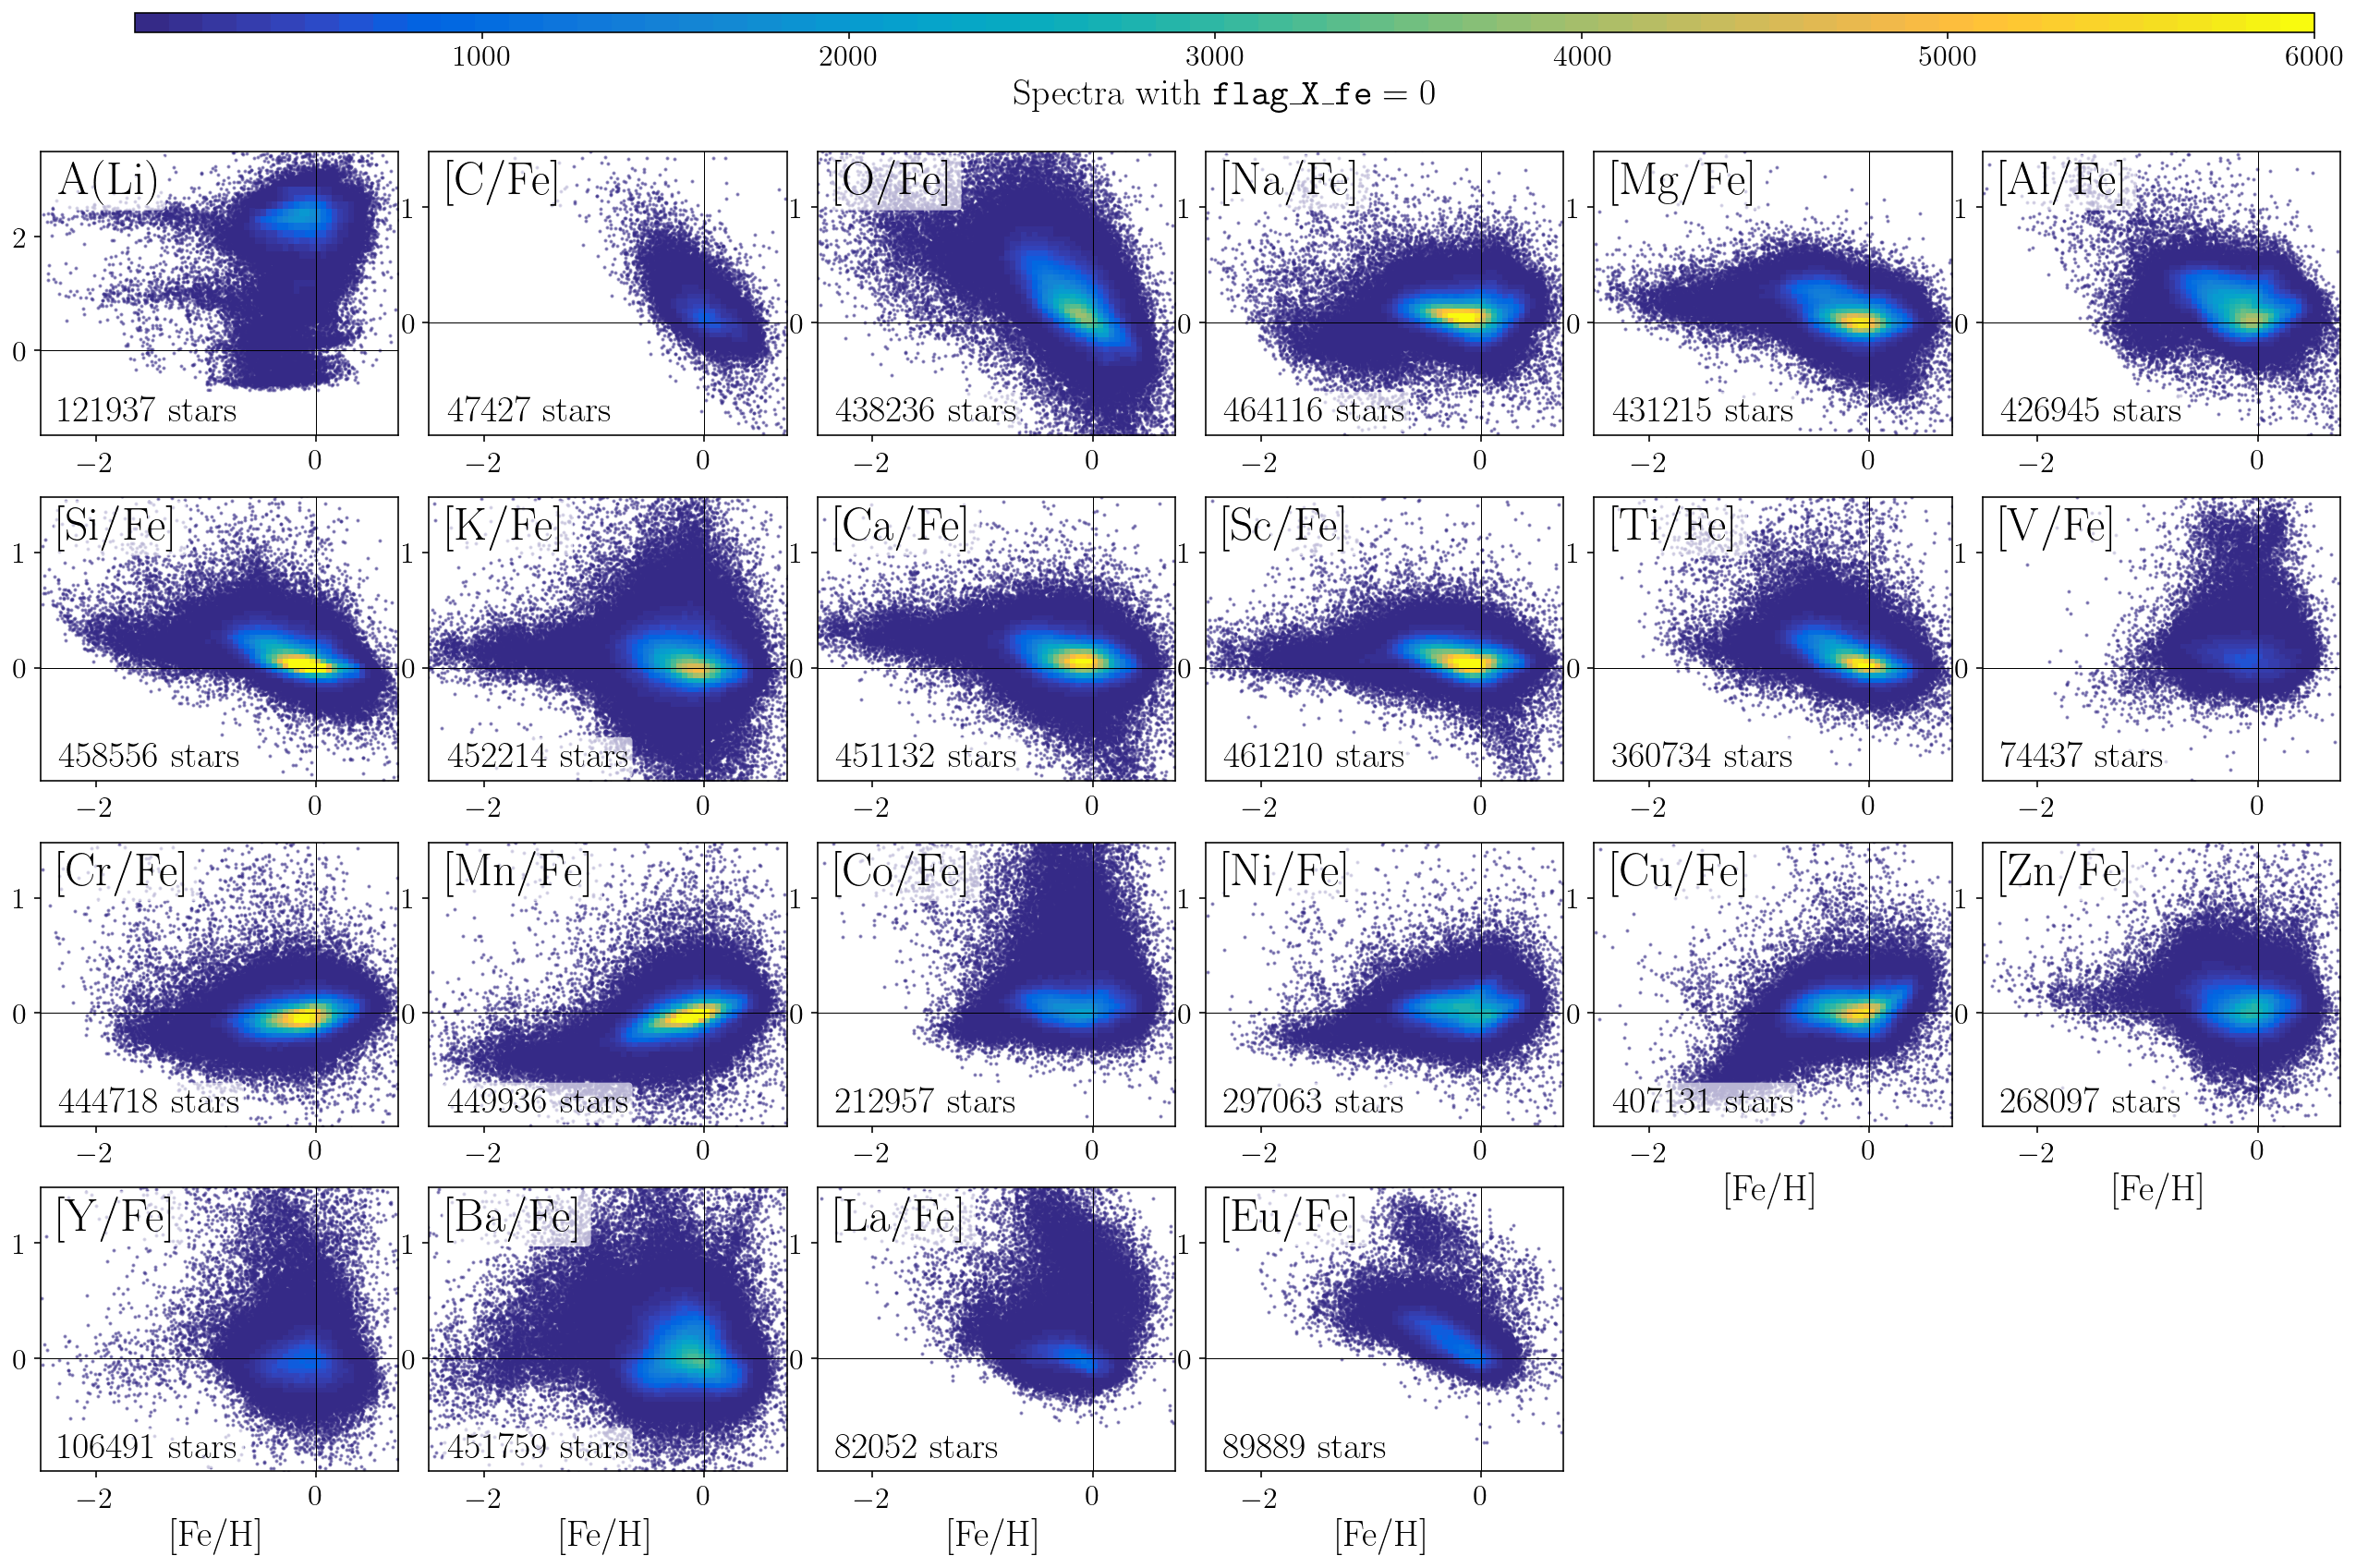

In [15]:
# Abundance overview with same script as for GALAH DR2

x_grid = 6
y_grid = 4

fig = plt.figure(figsize = (3*x_grid,3*y_grid))

mode = ['Li',
    'C', 'O', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Sc',
    'Ti', 'V', 'Cr', 'Mn', 'Co', 'Ni','Cu', 'Zn',
    'Y', 'Ba', 'La', 'Eu']

use_mode = mode

for each_index, each_mode in enumerate(use_mode):

    interimlines = False

    #print(each_mode)

    ax = plt.subplot(y_grid,x_grid,each_index+1)

    max_flag = 0
    min_snr = 0
    criterium = (dr3['flag_sp'] == 0) & (dr3['flag_'+each_mode+'_fe'] <= max_flag) & np.isfinite(dr3[each_mode+'_fe']) & (dr3['snr_c2_iraf'] > min_snr)# & (galah_dr2['red_flag']<64)
    #quality = r'$ \texttt{flag\_X\_Fe} \leq '+str(max_flag)+'~\&~S/N >$ '+str(min_snr)
    quality = r'$ \texttt{flag\_X\_fe} = '+str(max_flag)+'$'
    criterium_name = r'$S/N >$ '+str(min_snr)

    if each_mode != 'Li':
        ylim=(-1.00,1.50)
        bins=(0.05,0.025*5./3.)
        Y = dr3[each_mode+'_fe'][criterium]
    else:
        ylim = (-2,3)
        bins = (0.05,0.025*15./3.)
        Y = dr3[each_mode+'_fe'][criterium]+dr3['fe_h'][criterium]+1.05
        
#    ax.scatter(galah_dr2['Feh_cannon'],galah_dr2[each_mode+'_abund_cannon'],c='k',s=1,rasterized=True)
        
    dens2d = ab_dens2d(
        ax=ax,
        min_per_bin = 50,
        max_per_bin = 6000,
        xlim=(-3.0,0.65),
        ylim=ylim,
        bins=bins,
        X = dr3['fe_h'][criterium],
        Y = Y,
        xlabel='',#'$\mathrm{[Fe/H]~[dex]}$',
        ylabel='',#'$\mathrm{['+each_mode+'/Fe]~[dex]}$',
        interimlines=interimlines,
        colorbar=False
        );
    
    ax.set_rasterized(True)

    if each_index >= len(use_mode)-x_grid:
        ax.set_xlabel('[Fe/H]')
        
    if each_mode != 'Li':
        ax.set_xlim(-2.5,0.75)
        ax.set_ylim(-.98,1.48)
        ax.text(0.05,0.85,'$\mathrm{['+each_mode+'/Fe]}$',transform=ax.transAxes,fontsize=25,bbox=dict(facecolor='white', edgecolor='None', boxstyle='round', pad=0.1, alpha=0.65))
        ax.text(0.05,0.05,str(len(dr3['fe_h'][criterium]))+' stars',transform=ax.transAxes,fontsize=20,bbox=dict(facecolor='white', edgecolor='None', boxstyle='round', pad=0.1, alpha=0.65))
    else:
        ax.set_xlim(-2.5,0.75)
        ax.set_ylim(-1.5,3.5)
        ax.text(0.05,0.85,'$\mathrm{A('+each_mode+')}$',transform=ax.transAxes,fontsize=25,bbox=dict(facecolor='white', edgecolor='None', boxstyle='round', pad=0.1, alpha=0.65))
        ax.text(0.05,0.05,str(len(dr3['fe_h'][criterium]))+' stars',transform=ax.transAxes,fontsize=20,bbox=dict(facecolor='white', edgecolor='None', boxstyle='round', pad=0.1,alpha=0.65))

plt.tight_layout(h_pad=-0.5,w_pad=0.1)
fig.subplots_adjust(top=0.9)
cbar_ax = fig.add_axes([0.065, 0.975, 0.91, 0.012])
c=fig.colorbar(dens2d, cax=cbar_ax, orientation='horizontal')
c.set_label('Spectra with '+quality)
plt.savefig('Abundance_overview_flag_'+str(max_flag)+'_snr_'+str(min_snr)+'.pdf', dpi=150)
plt.savefig('../../../dr3_release_paper/figures/dr3_abundance_overview_flag_0_snr_0.png', dpi=100, bbox_inches='tight')


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


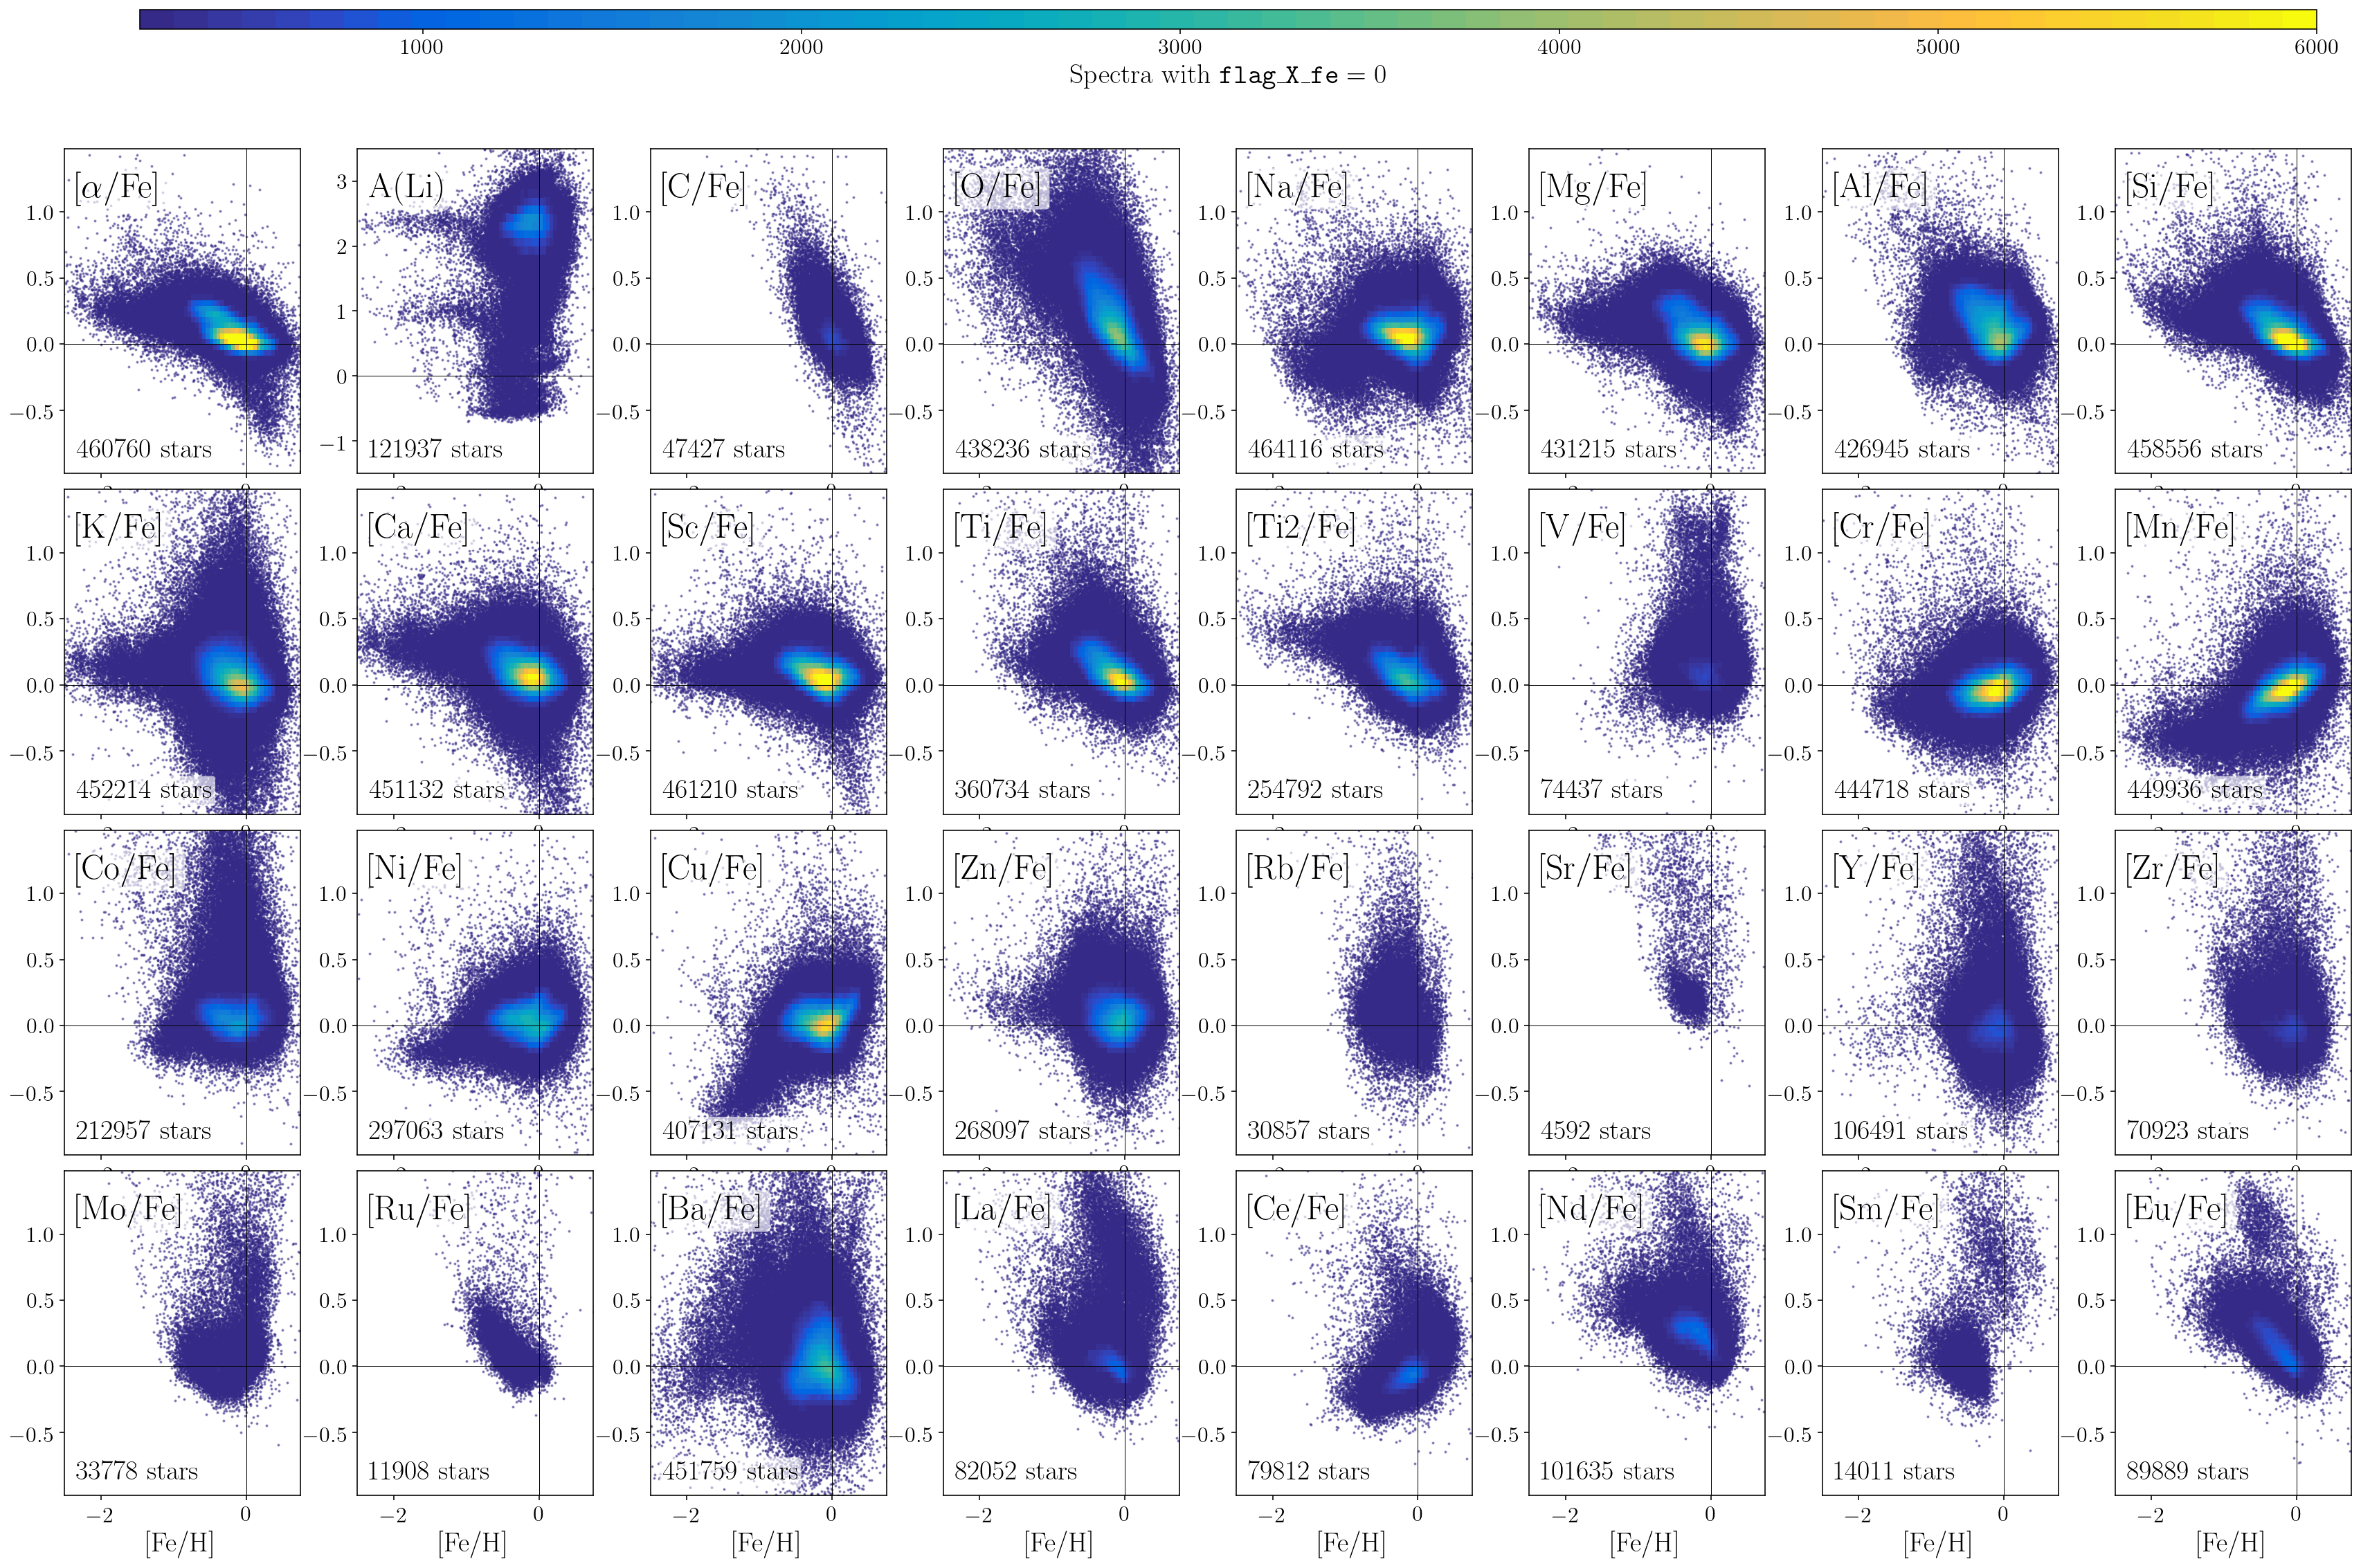

In [16]:
# Abundance overview directly compared to GALAH DR3

x_grid = 8
y_grid = 4

fig = plt.figure(figsize = (3*x_grid,4*y_grid))

mode = ['alpha','Li','C','O','Na','Mg','Al','Si','K','Ca','Sc','Ti','Ti2','V','Cr','Mn','Co','Ni','Cu','Zn','Rb','Sr','Y','Zr','Mo','Ru','Ba','La','Ce','Nd','Sm','Eu']

use_mode = mode

for each_index, each_mode in enumerate(use_mode):

    interimlines = False

    #print(each_mode)

    ax = plt.subplot(y_grid,x_grid,each_index+1)

    max_flag = 0
    min_snr = 0
    if each_mode != 'alpha':
        criterium = (dr3['flag_sp'] == 0) & (dr3['flag_'+each_mode+'_fe'] <= max_flag) & np.isfinite(dr3[each_mode+'_fe']) & (dr3['snr_c2_iraf'] > min_snr)# & (galah_dr2['red_flag']<64)
    else:
        criterium = (dr3['flag_sp'] == 0) & np.isfinite(dr3['alpha_fe']) & (dr3['snr_c2_iraf'] > min_snr)# & (galah_dr2['red_flag']<64)
    #quality = r'$ \texttt{flag\_X\_Fe} \leq '+str(max_flag)+'~\&~S/N >$ '+str(min_snr)
    quality = r'$ \texttt{flag\_X\_fe} = '+str(max_flag)+'$'
    criterium_name = r'$S/N >$ '+str(min_snr)

    if each_mode != 'Li':
        ylim=(-1.00,1.50)
        bins=(0.05,0.025*5./3.)
        Y = dr3[each_mode+'_fe'][criterium]
    else:
        ylim = (-2,3)
        bins = (0.05,0.025*15./3.)
        Y = dr3[each_mode+'_fe'][criterium]+dr3['fe_h'][criterium]+1.05
        
#    ax.scatter(galah_dr2['Feh_cannon'],galah_dr2[each_mode+'_abund_cannon'],c='k',s=1,rasterized=True)
        
    dens2d = ab_dens2d(
        ax=ax,
        min_per_bin = 250,
        max_per_bin = 6000,
        xlim=(-3.0,0.65),
        ylim=ylim,
        bins=bins,
        X = dr3['fe_h'][criterium],
        Y = Y,
        xlabel='',#'$\mathrm{[Fe/H]~[dex]}$',
        ylabel='',#'$\mathrm{['+each_mode+'/Fe]~[dex]}$',
        interimlines=interimlines,
        colorbar=False
        );
    
    ax.set_rasterized(True)

    if each_index >= len(use_mode)-x_grid:
        ax.set_xlabel('[Fe/H]')
        
    if each_mode != 'Li':
        ax.set_xlim(-2.5,0.75)
        ax.set_ylim(-.98,1.48)
        if each_mode != 'alpha':
            ax.text(0.05,0.85,'$\mathrm{['+each_mode+'/Fe]}$',transform=ax.transAxes,fontsize=25,bbox=dict(facecolor='white', edgecolor='None', boxstyle='round', pad=0.1, alpha=0.65))
        else:
            ax.text(0.05,0.85,r'$\mathrm{[\alpha/Fe]}$',transform=ax.transAxes,fontsize=25,bbox=dict(facecolor='white', edgecolor='None', boxstyle='round', pad=0.1, alpha=0.65))
        ax.text(0.05,0.05,str(len(dr3['fe_h'][criterium]))+' stars',transform=ax.transAxes,fontsize=20,bbox=dict(facecolor='white', edgecolor='None', boxstyle='round', pad=0.1, alpha=0.65))
    else:
        ax.set_xlim(-2.5,0.75)
        ax.set_ylim(-1.5,3.5)
        ax.text(0.05,0.85,'$\mathrm{A('+each_mode+')}$',transform=ax.transAxes,fontsize=25,bbox=dict(facecolor='white', edgecolor='None', boxstyle='round', pad=0.1, alpha=0.65))
        ax.text(0.05,0.05,str(len(dr3['fe_h'][criterium]))+' stars',transform=ax.transAxes,fontsize=20,bbox=dict(facecolor='white', edgecolor='None', boxstyle='round', pad=0.1,alpha=0.65))

plt.tight_layout(h_pad=-0.5,w_pad=0.1)
fig.subplots_adjust(top=0.9)
cbar_ax = fig.add_axes([0.065, 0.975, 0.91, 0.012])
c=fig.colorbar(dens2d, cax=cbar_ax, orientation='horizontal')
c.set_label('Spectra with '+quality)
plt.savefig('../../../dr3_release_paper/figures/dr3_abundance_overview_31_elements.png', dpi=100, bbox_inches='tight')



# Comparison with Bensby and APOGEE

In [7]:
def find_confidence_interval(x, pdf, confidence_level): 
    return pdf[pdf > x].sum() - confidence_level
def density_contour(xdata, ydata, nbins_x, nbins_y, fill=None, ax=None, **contour_kwargs): 
    """ Create a density contour plot.
    Parameters
    ----------
    xdata : numpy.ndarray
    ydata : numpy.ndarray
    nbins_x : int
        Number of bins along x dimension
    nbins_y : int
        Number of bins along y dimension
    ax : matplotlib.Axes (optional)
        If supplied, plot the contour to this axis. Otherwise, open a new figure
    contour_kwargs : dict
        kwargs to be passed to pyplot.contour()
    """

    H, xedges, yedges = np.histogram2d(xdata, ydata, bins=(nbins_x,nbins_y), normed=True)
    x_bin_sizes = (xedges[1:] - xedges[:-1]).reshape((1,nbins_x))
    y_bin_sizes = (yedges[1:] - yedges[:-1]).reshape((nbins_y,1))

    pdf = (H*(x_bin_sizes*y_bin_sizes))

    one_sigma = scipy.optimize.brentq(find_confidence_interval, 0., 1., args=(pdf, 0.682689492137086))
    two_sigma = scipy.optimize.brentq(find_confidence_interval, 0., 1., args=(pdf, 0.954499736103642))
    three_sigma = scipy.optimize.brentq(find_confidence_interval, 0., 1., args=(pdf, 0.997300203936740))
    levels = [three_sigma, two_sigma, one_sigma]
    
    X, Y = 0.5*(xedges[1:]+xedges[:-1]), 0.5*(yedges[1:]+yedges[:-1])
    Z = pdf.T

    if fill == None:
        if ax == None:
            contour = plt.contour(X, Y, Z, levels=levels, origin="lower", **contour_kwargs)
        else:
            contour = ax.contour(X, Y, Z, levels=levels, origin="lower", **contour_kwargs)
    else:
        if ax == None:
            contour = plt.contourf(X, Y, Z, levels=levels, origin="lower", **contour_kwargs)
        else:
            contour = ax.contourf(X, Y, Z, levels=levels, origin="lower", **contour_kwargs)
    return contour
class ImageHandler(HandlerBase): 
    def create_artists(self, legend, orig_handle,
                       xdescent, ydescent, width, height, fontsize,
                       trans):

        # enlarge the image by these margins
        sx, sy = self.image_stretch 

        # create a bounding box to house the image
        bb = Bbox.from_bounds(xdescent - sx,
                              ydescent - sy,
                              width + sx,
                              height + sy)

        tbb = TransformedBbox(bb, trans)
        image = BboxImage(tbb)
        image.set_data(self.image_data)

        self.update_prop(image, orig_handle, legend)

        return [image]

    def set_image(self, image_path, image_stretch=(0, 0)):
        if not os.path.exists(image_path):
            sample = get_sample_data("grace_hopper.png", asfileobj=False)
            self.image_data = read_png(sample)
        else:
            self.image_data = read_png(image_path)

        self.image_stretch = image_stretch
        _parula_data_0 = [[1,1,1],
                [0.2081, 0.1663, 0.5292], 
                [0.2116238095, 0.1897809524, 0.5776761905], 
                [0.212252381, 0.2137714286, 0.6269714286], 
                [0.2081, 0.2386, 0.6770857143], 
                [0.1959047619, 0.2644571429, 0.7279], 
                [0.1707285714, 0.2919380952, 0.779247619], 
                [0.1252714286, 0.3242428571, 0.8302714286], 
                [0.0591333333, 0.3598333333, 0.8683333333], 
                [0.0116952381, 0.3875095238, 0.8819571429], 
                [0.0059571429, 0.4086142857, 0.8828428571], 
                [0.0165142857, 0.4266, 0.8786333333], 
                [0.032852381, 0.4430428571, 0.8719571429], 
                [0.0498142857, 0.4585714286, 0.8640571429], 
                [0.0629333333, 0.4736904762, 0.8554380952], 
                [0.0722666667, 0.4886666667, 0.8467], 
                [0.0779428571, 0.5039857143, 0.8383714286], 
                [0.079347619, 0.5200238095, 0.8311809524], 
                [0.0749428571, 0.5375428571, 0.8262714286], 
                [0.0640571429, 0.5569857143, 0.8239571429], 
                [0.0487714286, 0.5772238095, 0.8228285714], 
                [0.0343428571, 0.5965809524, 0.819852381], 
                [0.0265, 0.6137, 0.8135], 
                [0.0238904762, 0.6286619048, 0.8037619048], 
                [0.0230904762, 0.6417857143, 0.7912666667], 
                [0.0227714286, 0.6534857143, 0.7767571429], 
                [0.0266619048, 0.6641952381, 0.7607190476], 
                [0.0383714286, 0.6742714286, 0.743552381], 
                [0.0589714286, 0.6837571429, 0.7253857143], 
                [0.0843, 0.6928333333, 0.7061666667], 
                [0.1132952381, 0.7015, 0.6858571429], 
                [0.1452714286, 0.7097571429, 0.6646285714], 
                [0.1801333333, 0.7176571429, 0.6424333333], 
                [0.2178285714, 0.7250428571, 0.6192619048], 
                [0.2586428571, 0.7317142857, 0.5954285714], 
                [0.3021714286, 0.7376047619, 0.5711857143], 
                [0.3481666667, 0.7424333333, 0.5472666667], 
                [0.3952571429, 0.7459, 0.5244428571], 
                [0.4420095238, 0.7480809524, 0.5033142857], 
                [0.4871238095, 0.7490619048, 0.4839761905], 
                [0.5300285714, 0.7491142857, 0.4661142857], 
                [0.5708571429, 0.7485190476, 0.4493904762],
                [0.609852381, 0.7473142857, 0.4336857143], 
                [0.6473, 0.7456, 0.4188], 
                [0.6834190476, 0.7434761905, 0.4044333333], 
                [0.7184095238, 0.7411333333, 0.3904761905], 
                [0.7524857143, 0.7384, 0.3768142857], 
                [0.7858428571, 0.7355666667, 0.3632714286], 
                [0.8185047619, 0.7327333333, 0.3497904762], 
                [0.8506571429, 0.7299, 0.3360285714], 
                [0.8824333333, 0.7274333333, 0.3217], 
                [0.9139333333, 0.7257857143, 0.3062761905], 
                [0.9449571429, 0.7261142857, 0.2886428571], 
                [0.9738952381, 0.7313952381, 0.266647619], 
                [0.9937714286, 0.7454571429, 0.240347619], 
                [0.9990428571, 0.7653142857, 0.2164142857], 
                [0.9955333333, 0.7860571429, 0.196652381], 
                [0.988, 0.8066, 0.1793666667], 
                [0.9788571429, 0.8271428571, 0.1633142857], 
                [0.9697, 0.8481380952, 0.147452381], 
                [0.9625857143, 0.8705142857, 0.1309], 
                [0.9588714286, 0.8949, 0.1132428571], 
                [0.9598238095, 0.9218333333, 0.0948380952], 
                [0.9661, 0.9514428571, 0.0755333333], 
                [0.9763, 0.9831, 0.0538],
                [1,1,1]
                ]

In [8]:
# get APOGEE and Bensby data

apogee = pyfits.getdata('../../../../Surveys/APOGEE_DR16.fits',1)

bensby = {}
bensby_2014 = pyfits.getdata('bensby2014.fits',1)
battistini_2015 = pyfits.getdata('battistini_2015.fits',1)
battistini_2016 = pyfits.getdata('battistini_2016.fits',1)
bensby_2018 = pyfits.getdata('bensby2018.fits',1)
good = bensby_2018['Flag'] >= 0
bensby['Fe_H_Li'] = bensby_2014['Fe_H'][good]
bensby['Li'] = bensby_2018['A_Li'][good]

bensby['Teff'] = bensby_2014['Teff']
bensby['logg'] = bensby_2014['logg']
bensby['Fe_H'] = bensby_2014['Fe_H']

for each in ['O', 'Na', 'Mg', 'Al', 'Si', 'Ca', 'Ti', 'Cr', 'Ni', 'Zn', 'Y', 'Ba']:
    not_good = abs(bensby_2014[each+'_Fe'])<=0.001
    adjust = bensby_2014[each+'_Fe']
    adjust[not_good] = np.nan
    bensby[each] = adjust

for each in ['Sc','V','Mn','Co']:
    good = np.isfinite(battistini_2015[each+'_Fe']) & (np.abs(battistini_2015[each+'_Fe'] + battistini_2015['__Fe_H_']) > 0.001)
    bensby[each] = battistini_2015[each+'_Fe'][good]
    bensby['Fe_H_'+each] = battistini_2015['__Fe_H_'][good]
    
for each in ['Sr','Zr','La','Ce','Nd','Sm','Eu']:
    good = np.isfinite(battistini_2016[each+'_Fe']) & (np.abs(battistini_2016[each+'_Fe'] + battistini_2016['__Fe_H_']) > 0.001)
    bensby[each] = battistini_2016[each+'_Fe'][good]
    bensby['Fe_H_'+each] = battistini_2016['__Fe_H_'][good]

In [9]:
# Limits for the comparison plots for FLAG 0 

lims_abund0 = {}
lims_abund0['Li'] = [-2.2, 0.75, -1.3, 3.7]
lims_abund0['C'] = [-2.2, 0.75, -0.7, 0.7]
lims_abund0['O'] = [-2.2, 0.75, -0.6, 1.25]
lims_abund0['Na'] = [-2.2, 0.75, -0.6, 0.6]
lims_abund0['Mg'] = [-2.2, 0.75, -0.6, 0.7]
lims_abund0['Al'] = [-2.2, 0.75, -1.2, 1.]
lims_abund0['Si'] = [-2.2, 0.75, -0.5, 0.75]
lims_abund0['K'] = [-2.2, 0.75, -0.75, 1.25]
lims_abund0['Ca'] = [-2.2, 0.75, -0.5, 0.75]
lims_abund0['Sc'] = [-2.2, 0.75, -0.45, 0.45]
lims_abund0['Ti'] = [-2.2, 0.75, -0.45, 0.45]
lims_abund0['Ti2'] = [-2.2, 0.75, -0.45, 0.45]
lims_abund0['V'] = [-2.2, 0.75, -0.9, 0.9]
lims_abund0['Cr'] = [-2.2, 0.75, -0.45, 0.45]
lims_abund0['Mn'] = [-2.2, 0.75, -1.05, 0.5]
lims_abund0['Co'] = [-2.2, 0.75, -0.5, 0.5]
lims_abund0['Ni'] = [-2.2, 0.75, -0.7, 0.8]
lims_abund0['Cu'] = [-2.2, 0.75, -0.9, 0.5]
lims_abund0['Zn'] = [-2.2, 0.75, -0.75, 0.9]
lims_abund0['Rb'] = [-2.2, 0.75, -0.7, 1.25]
lims_abund0['Sr'] = [-2.2, 0.75, -0.7, 1.25]
lims_abund0['Y'] = [-2.2, 0.75, -0.5, 1.1]
lims_abund0['Zr'] = [-2.2, 0.75, -0.7, 1.25]
lims_abund0['Mo'] = [-2.2, 0.75, -0.7, 1.25]
lims_abund0['Ru'] = [-2.2, 0.75, -0.7, 1.25]
lims_abund0['Ba'] = [-2.2, 0.75, -0.7, 1.25]
lims_abund0['La'] = [-2.2, 0.75, -0.5, 0.75]
lims_abund0['Ce'] = [-2.2, 0.75, -0.7, 1.25]
lims_abund0['Nd'] = [-2.2, 0.75, -0.7, 1.25]
lims_abund0['Sm'] = [-2.2, 0.75, -0.7, 1.25]
lims_abund0['Eu'] = [-2.2, 0.75, -0.45, 0.85]


findfont: Font family ['lmodern'] not found. Falling back to DejaVu Sans.


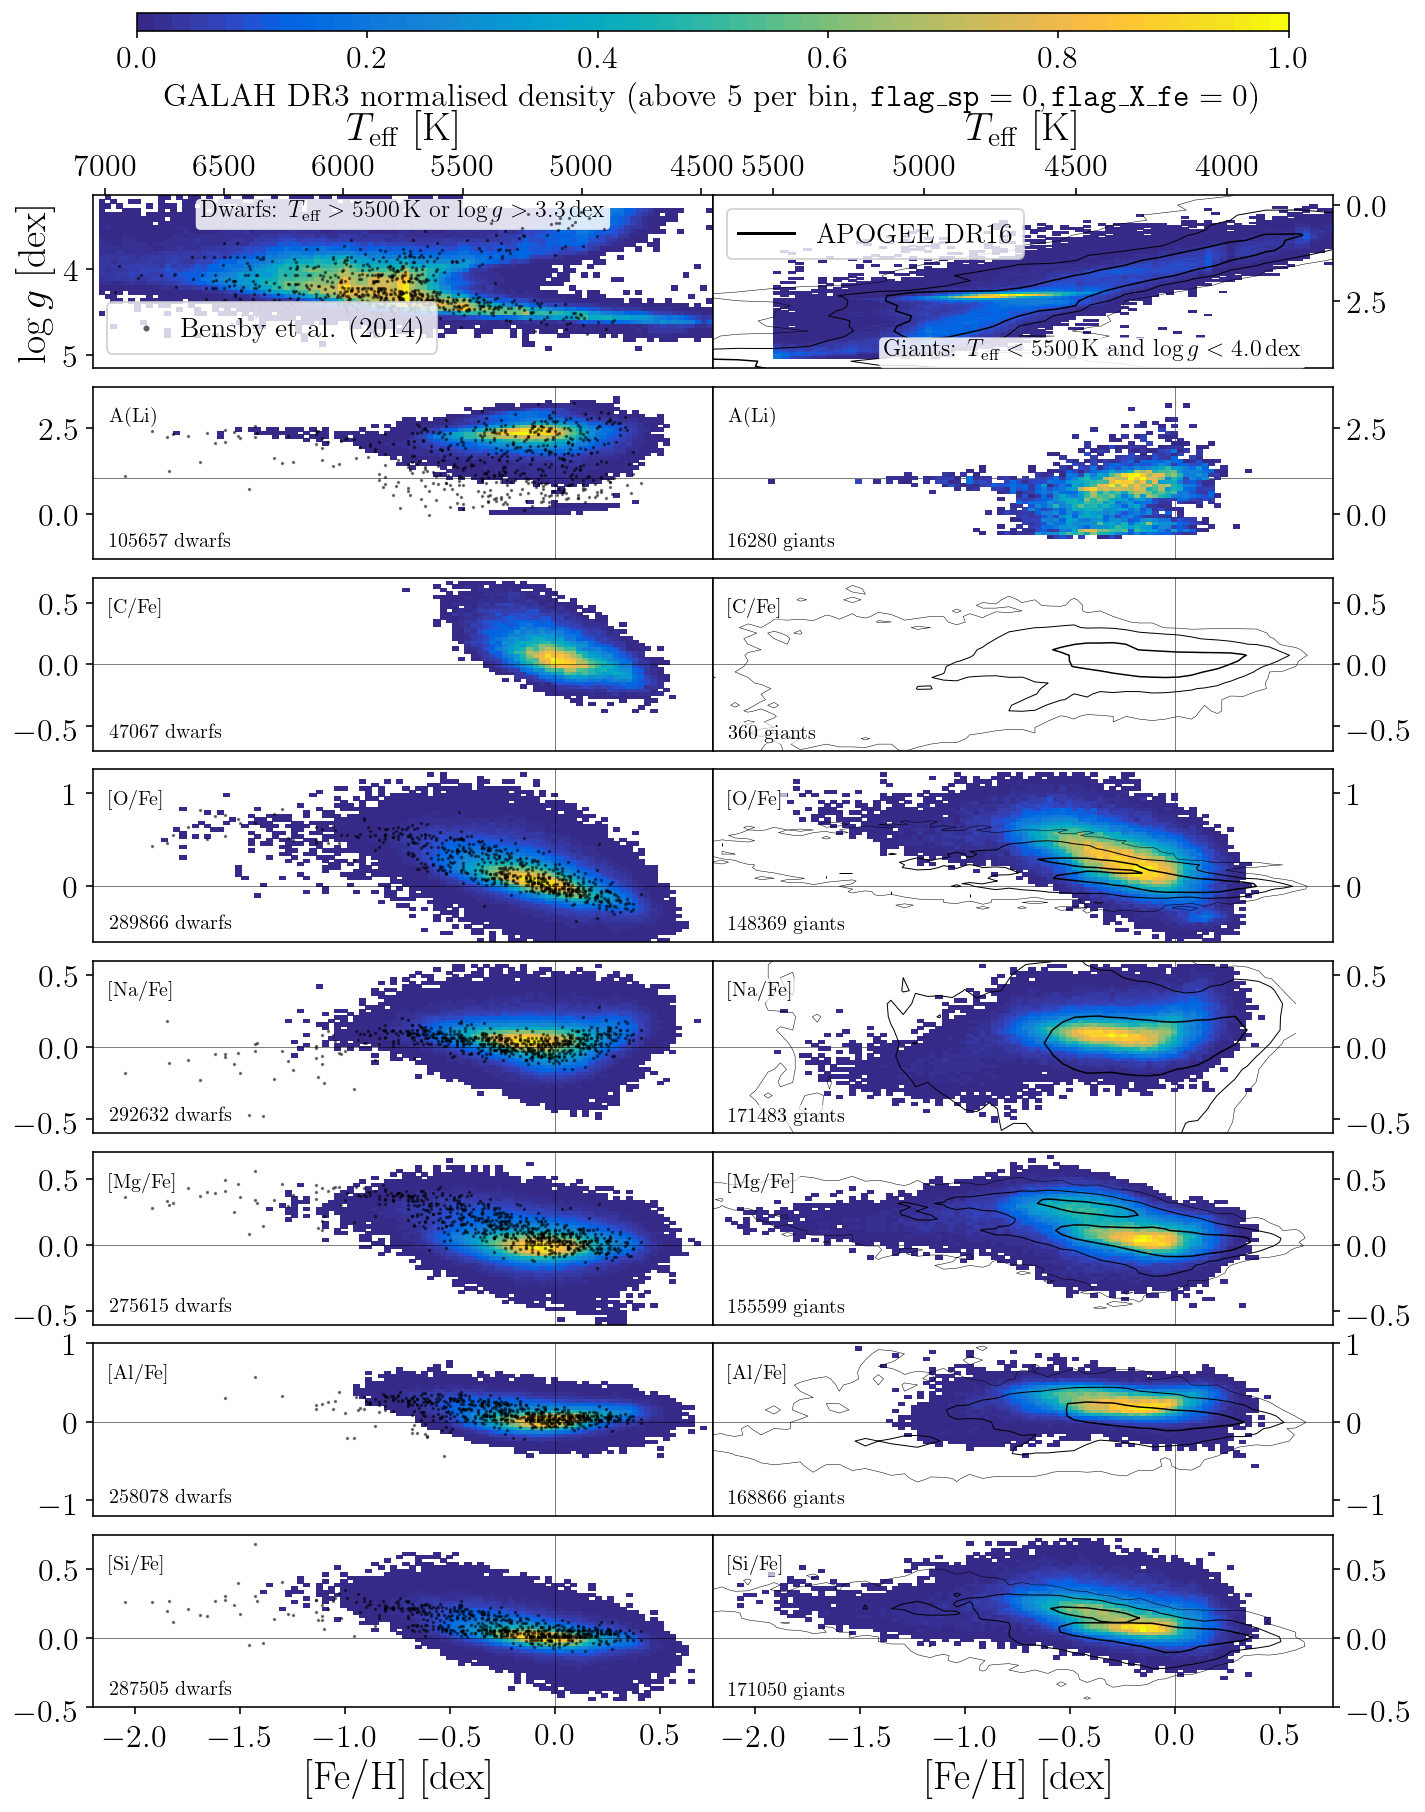

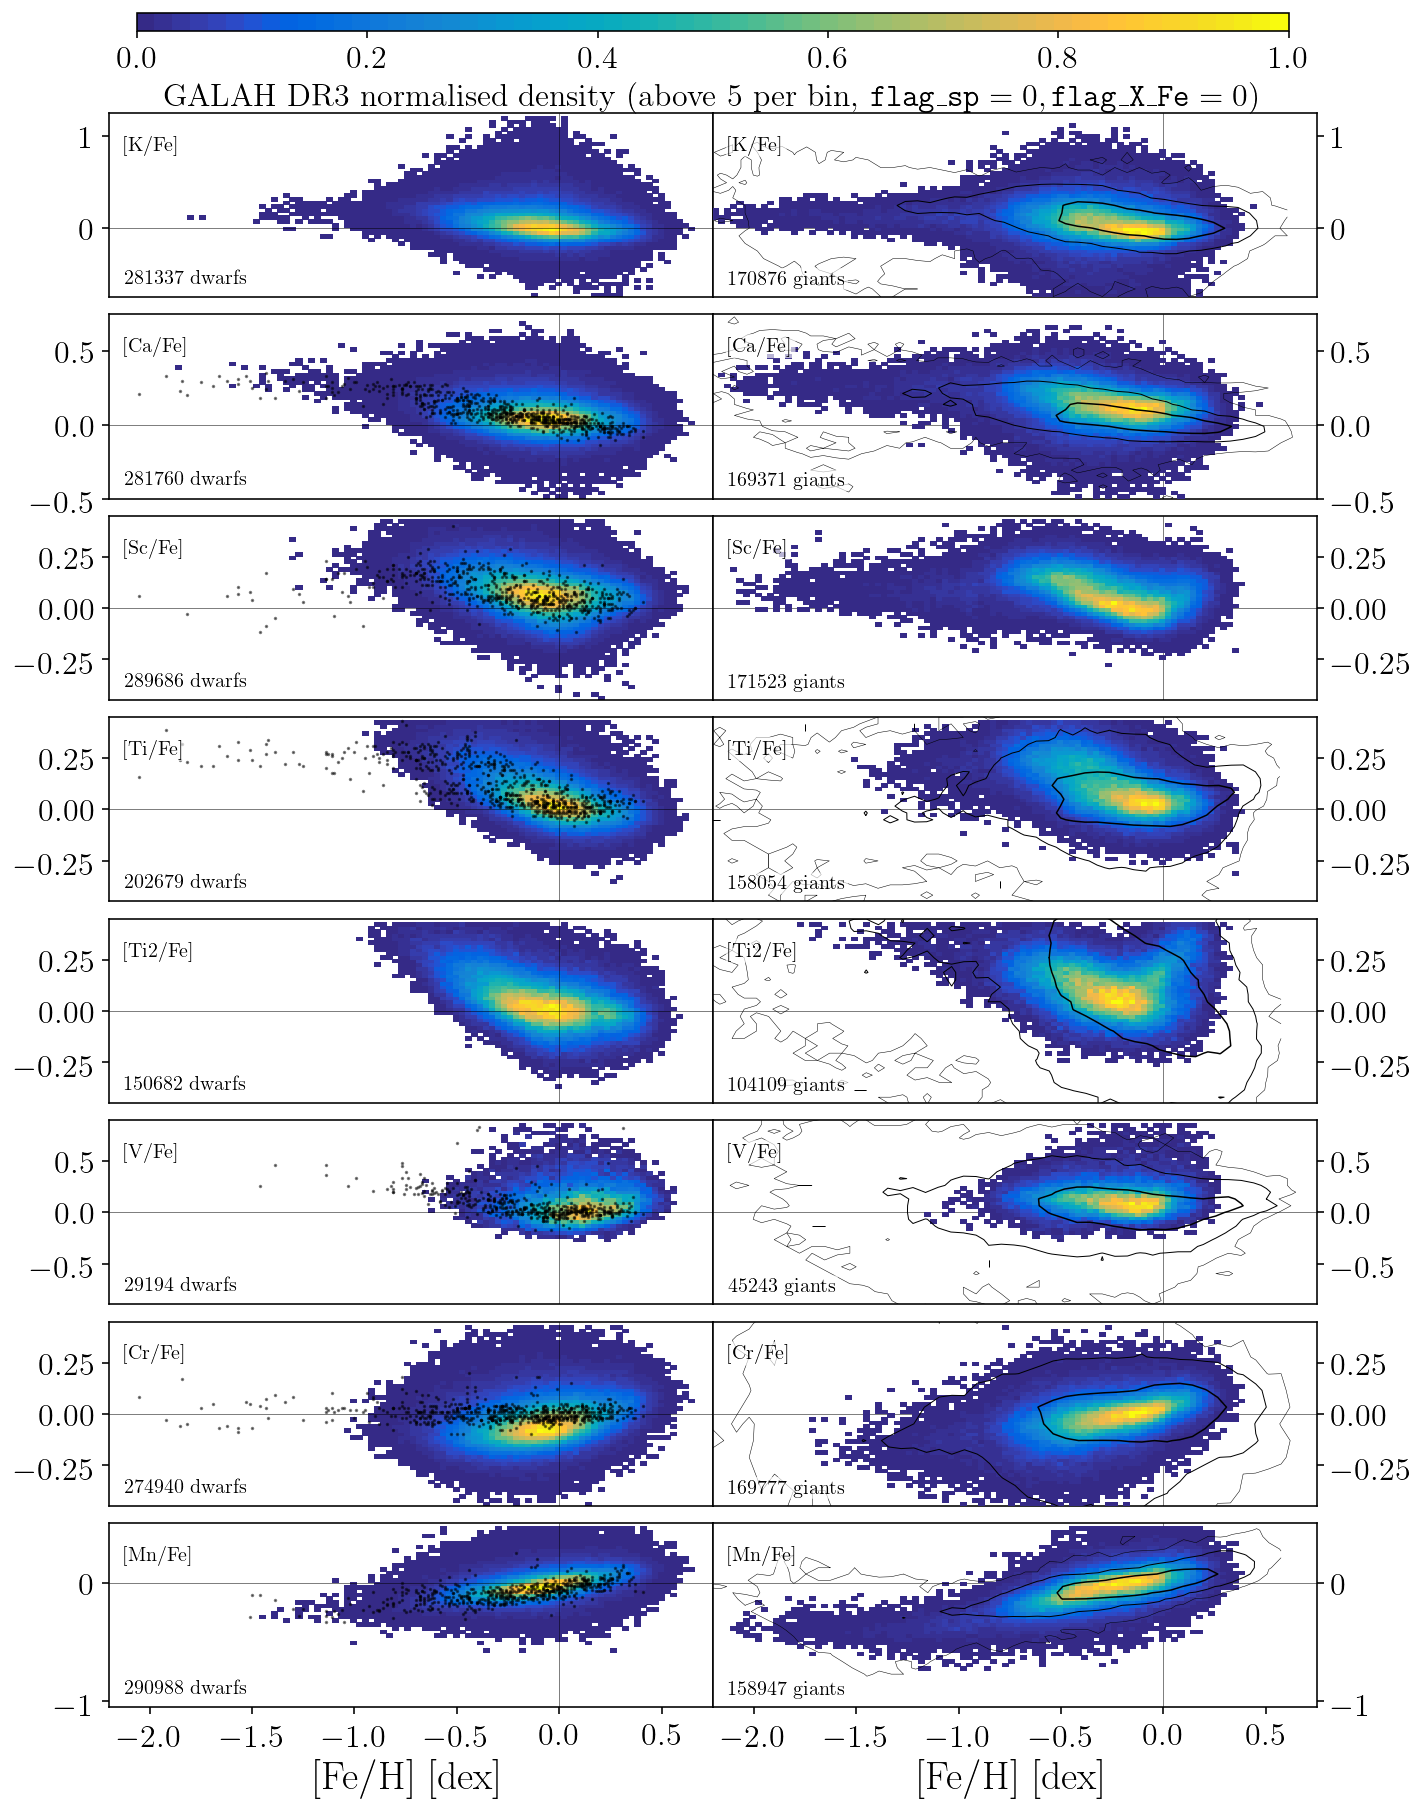

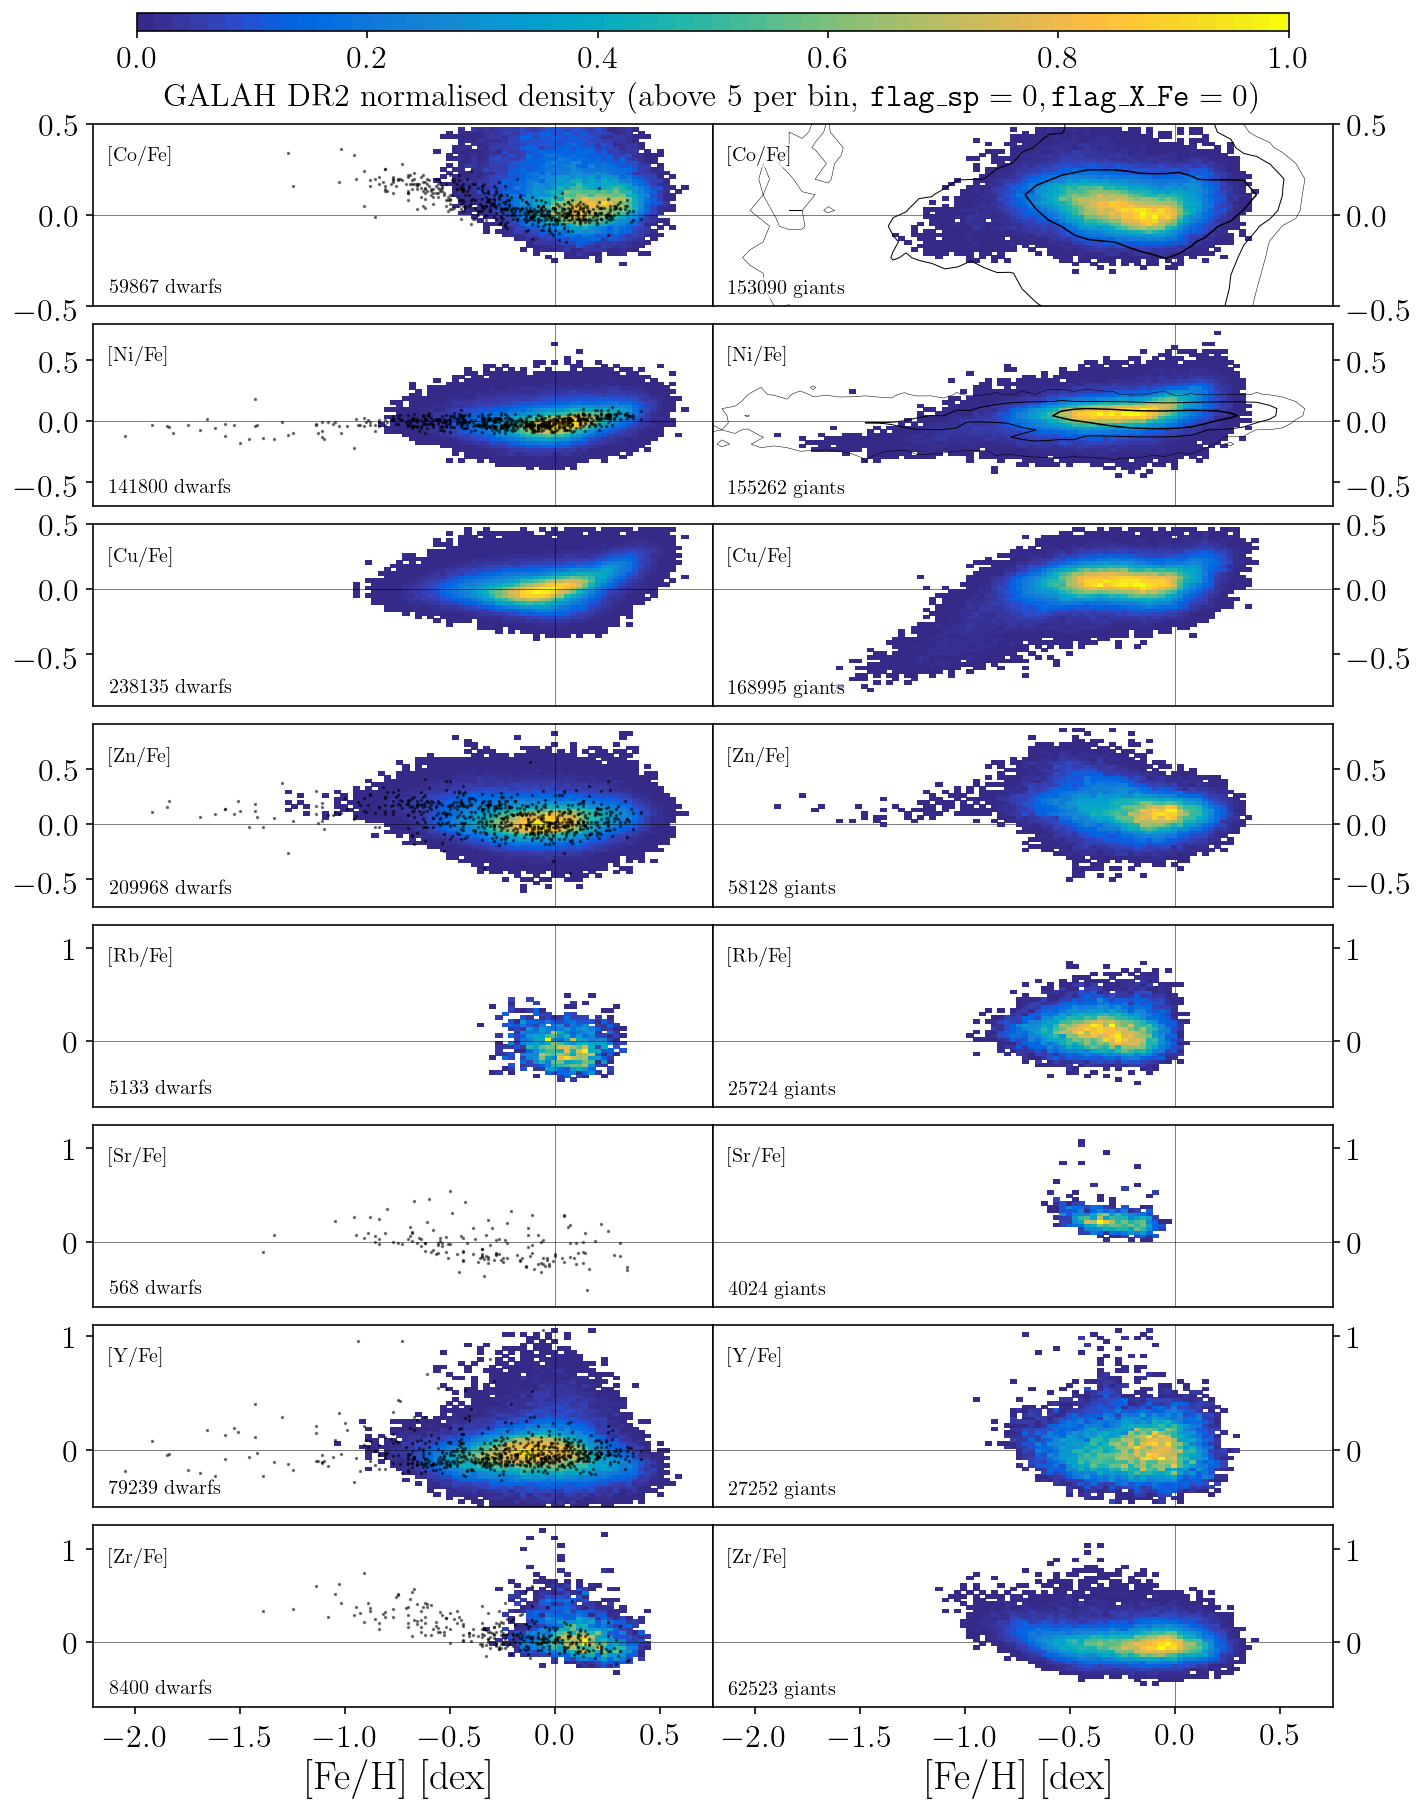

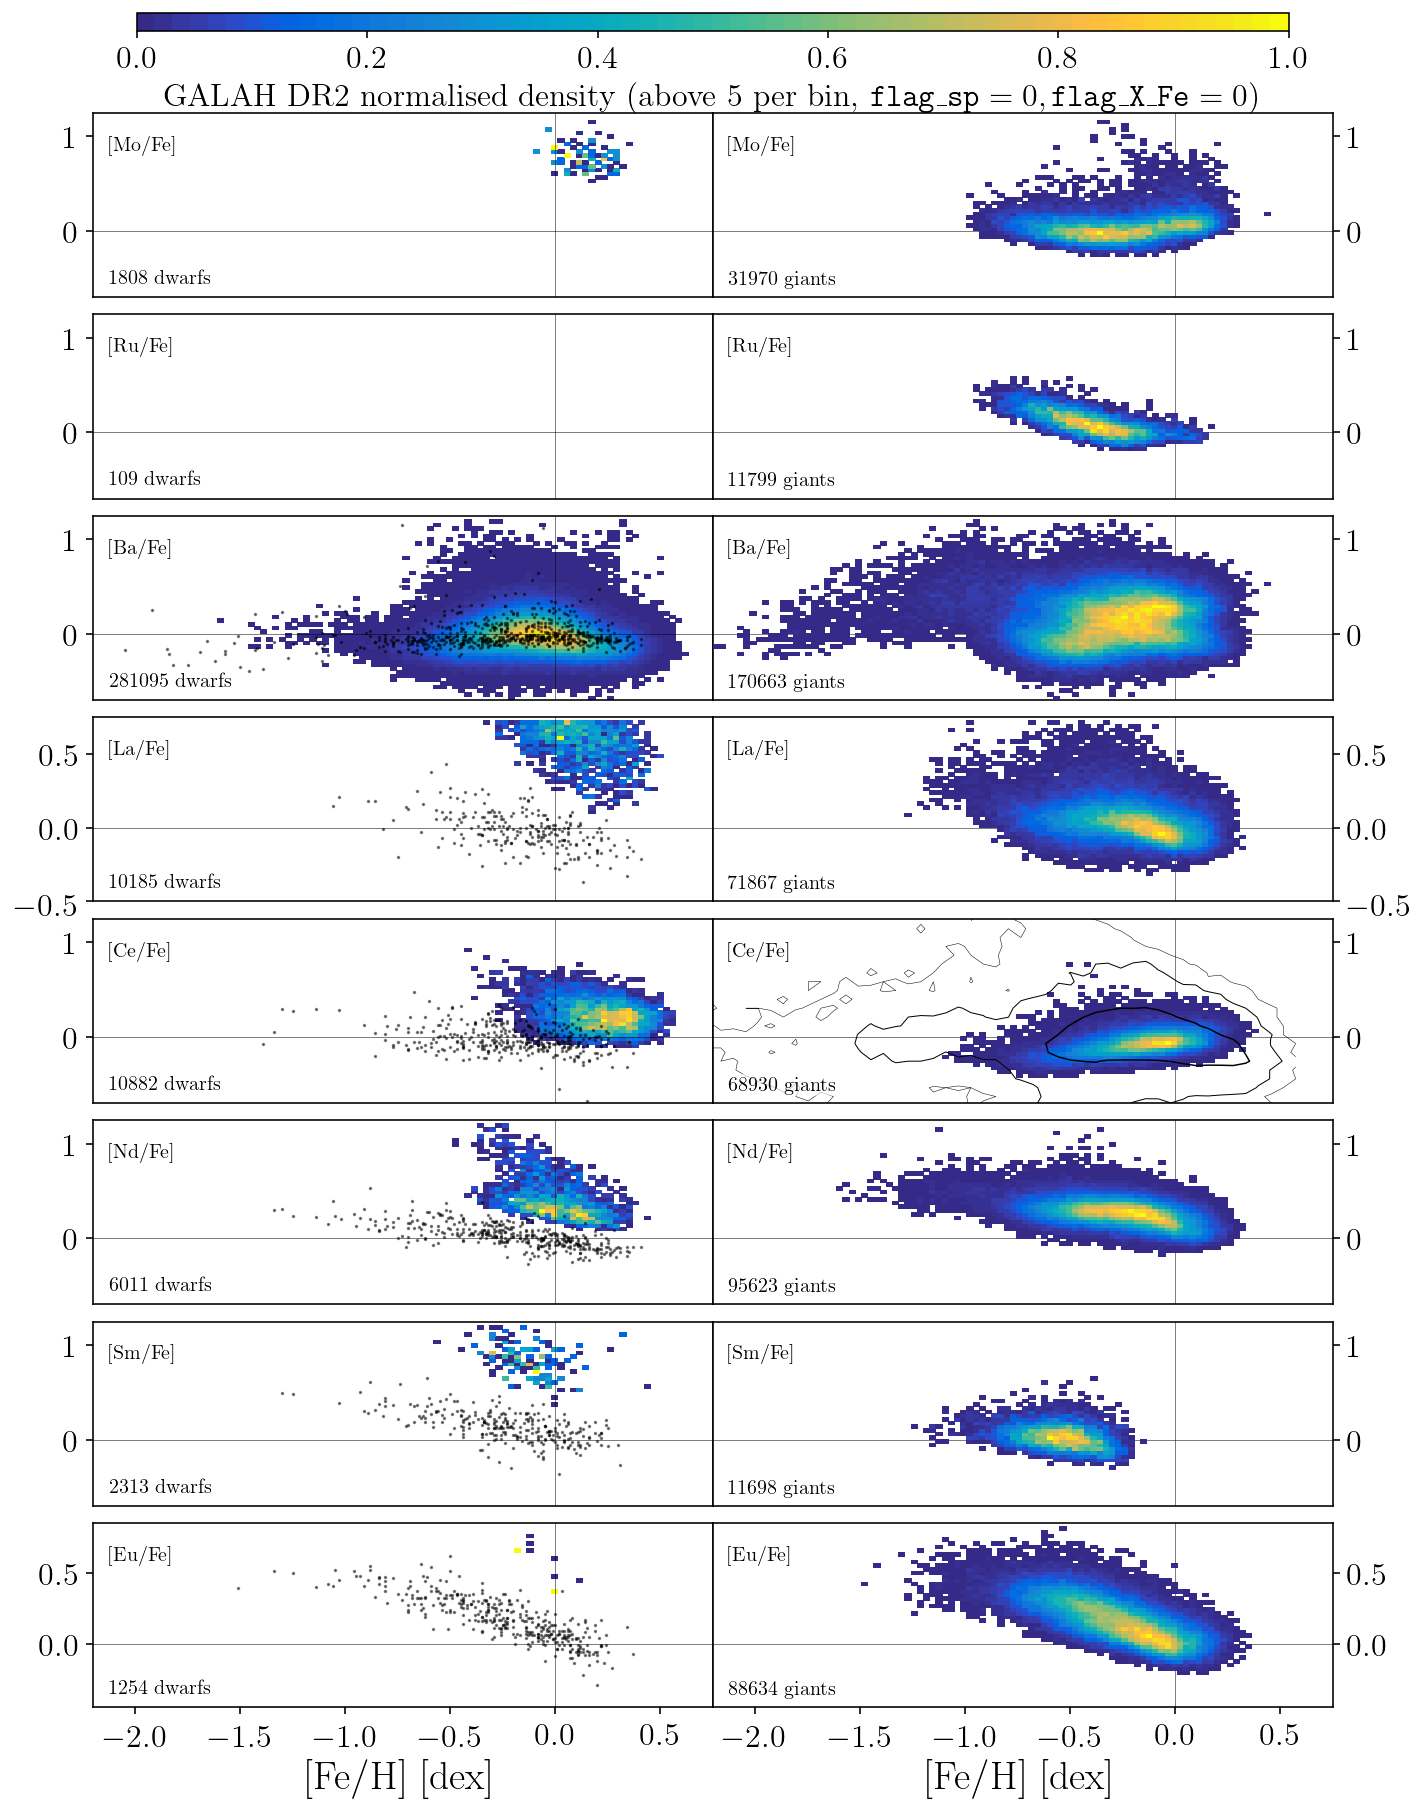

In [10]:
# Plot the DWARFS and GIANTS ABUNDANCES 

xfe_flag = 0

if xfe_flag == 0:
    lims_abund = lims_abund0
else:
    lims_abund = lims_abund1

#flag_apogee = []
#for each in apogee_all['ASPCAPFLAG']:
#    flag_apogee.append(each & 2**23) 
#flag_apogee = np.array(apogee_all)
#apogee = apogee_all[(flag_apogee == 0)]

fig = plt.figure(figsize=(10,12))

kwargs_bensby = dict(c='k', s=0.5, alpha=0.5,zorder=4)
kwargs_apogee = dict(c='k', s=0.5, alpha=0.5,zorder=4)

#lims_hrd_bensby = [3750,7250,0,5.5]
#lims_hrd_apogee = [3750,7250,0,5.5]
lims_hrd_bensby = [4450,7050,3.15,5.15]
lims_hrd_apogee = [3650,5700,-0.25,4.25]

kwargs_hist2d_param = dict(cmap=parula, cmin=1, bins = (np.arange(lims_hrd_bensby[0],lims_hrd_bensby[1],25),np.arange(lims_hrd_bensby[2],lims_hrd_bensby[3],0.05)),zorder=2);
kwargs_scatter_param = dict(c=_parula_data[0],s=2, zorder=1);

ax = plt.subplot2grid((8,2), (0, 0))

def plot_hrd_dwarfs(ax=ax):

    ax.scatter(bensby['Teff'], bensby['logg'], label='Bensby et al. (2014)', **kwargs_bensby);

    good_overlap_bensby = (dr3['flag_sp'] == 0) & ((dr3['teff'] > 5500) | (dr3['logg'] > 3.3))
    ax.hist2d(
        dr3['teff'][good_overlap_bensby],
        dr3['logg'][good_overlap_bensby],
        **kwargs_hist2d_param
    )
    ax.set_xlim(lims_hrd_bensby[1],lims_hrd_bensby[0])
    ax.set_ylim(lims_hrd_bensby[3],lims_hrd_bensby[2])
    ax.xaxis.tick_top()
    ax.set_xlabel(tex_dict['Teff'])
    ax.xaxis.set_label_position('top') 
    ax.set_ylabel(tex_dict['Logg'])
    ax.legend(fontsize=14, markerscale=3, loc='lower left', handletextpad=0.25)
    ax.text(0.5,0.95,r'Dwarfs: $T_\text{eff} > 5500\,\mathrm{K}$ or $\log g > 3.3\,\mathrm{dex}$',fontsize=12,transform=ax.transAxes,ha='center',va='top', bbox=dict(facecolor='white', edgecolor='None', boxstyle='round', pad=0.2, alpha=0.85))

    return ax
plot_hrd_dwarfs(ax=ax)

ax = plt.subplot2grid((8,2), (0, 1))
    
def plot_hrd_giants(ax=ax):
    badbits = badbits = 2**23
    good_apogee =  (apogee['LOGG'] > -10) & (apogee['TEFF'] > 0) & (apogee['STARFLAG'] == 0) & (apogee['ASPCAPFLAG'] == 0) #np.bitwise_and(apogee['aspcapflag'], badbits) == 0
    
    kwargs_hist2d_param = dict(cmap=parula, cmin=1, bins = (np.arange(lims_hrd_apogee[0],lims_hrd_apogee[1],25),np.arange(lims_hrd_apogee[2],lims_hrd_apogee[3],0.05)));

    good_overlap_apogee = (dr3['flag_sp'] == 0) & ((dr3['teff'] < 5500) & (dr3['logg'] < 4.0))
    ax.hist2d(
        dr3['teff'][good_overlap_apogee],
        dr3['logg'][good_overlap_apogee],
        **kwargs_hist2d_param
    )
    
    good_apogee = (apogee['LOGG'] > -10) & (apogee['TEFF'] > 0) & (apogee['STARFLAG'] == 0) & (apogee['ASPCAPFLAG'] == 0)
    density_contour(
        apogee['TEFF'][good_apogee], 
        apogee['LOGG'][good_apogee],
        50,50,colors='k',linewidths=[0.25,0.5,0.75],ax=ax,zorder=5)

    ax.set_xlim(lims_hrd_apogee[1],lims_hrd_apogee[0])
    ax.set_ylim(lims_hrd_apogee[3],lims_hrd_apogee[2])
    ax.xaxis.tick_top()
    ax.set_xlabel(tex_dict['Teff'])
    ax.xaxis.set_label_position('top') 
    ax.yaxis.tick_right()
    s1 = ax.plot([4500,4500],[1,1],c='k', label='APOGEE DR16')
    ax.legend(loc='upper left',fontsize=14)
    ax.text(0.95,0.025,r'Giants: $T_\text{eff} < 5500\,\mathrm{K}$ and $\log g < 4.0\,\mathrm{dex}$',fontsize=12,transform=ax.transAxes,ha='right',va='bottom', bbox=dict(facecolor='white', edgecolor='None', boxstyle='round', pad=0.2, alpha=0.85),zorder=10)

    return ax
plot_hrd_giants(ax=ax)

elements = ['Li','C','O','Na','Mg','Al','Si',
            'K','Ca','Sc','Ti','Ti2','V','Cr','Mn',
            'Co','Ni','Cu','Zn','Rb','Sr','Y','Zr',
            'Mo','Ru','Ba','La','Ce','Nd','Sm','Eu']

def plot_bensby_1(each_index, each_element, lims_abund, hrd=True):

    if hrd==True:
        ax = plt.subplot2grid((8,2), (1+each_index, 0))
        if 1+each_index == 7:
            ax.set_xlabel(tex_dict['Fe_H'])
        else:
            ax.set_xticks([])

    else:
        ax = plt.subplot2grid((8,2), (each_index, 0))
        if each_index == 7:
            ax.set_xlabel(tex_dict['Fe_H'])
        else:
            ax.set_xticks([])


    try:
        lims_abund_use = lims_abund[each_element]
    except:
        lims_abund_use = [-2.2, 0.75, -1, 2]

    kwargs_hist2d_param = dict(cmap=parula, cmin=5, bins = (np.arange(lims_abund_use[0],lims_abund_use[1],(lims_abund_use[1]-lims_abund_use[0])/100.),np.arange(lims_abund_use[2],lims_abund_use[3],(lims_abund_use[3]-lims_abund_use[2])/50.)),zorder=2);
    good_overlap_bensby = (
        #(dr3['red_flag'] < 64) & 
        (dr3['flag_sp'] == 0) & 
        np.isfinite(dr3[each_element+'_fe']) &
        (dr3['flag_'+each_element+'_fe'] <= xfe_flag) &
        (dr3['flag_sp'] == 0) & ((dr3['teff'] > 5500) | (dr3['logg'] > 3.5))
        )
    if each_element == 'Li':
        ax.text(0.025,0.8,'A(Li)',transform=ax.transAxes,bbox=dict(facecolor='white', edgecolor='None', boxstyle='round', pad=0.1, alpha=0.65),zorder=10)
        #ax.text(1-0.025,1-0.8,'Incl. GALAH points',transform=ax.transAxes,bbox=dict(facecolor='white', edgecolor='None', boxstyle='round', pad=0.1, alpha=0.65))
        abund = dr3[each_element+'_fe'][good_overlap_bensby] + dr3['fe_h'][good_overlap_bensby] + 1.05
    else:
        ax.text(0.025,0.8,'['+each_element+'/Fe]',transform=ax.transAxes,bbox=dict(facecolor='white', edgecolor='None', boxstyle='round', pad=0.1, alpha=0.65),zorder=10)
        abund = dr3[each_element+'_fe'][good_overlap_bensby]
    ax.hist2d(
        dr3['fe_h'][good_overlap_bensby],
        abund,
        **kwargs_hist2d_param
    )
    #     if each_element == 'Li':
    #         ax.scatter(
    #             dr3['Feh_cannon'][good_overlap_bensby],
    #             abund,
    #             **kwargs_scatter_param
    #         )
    ax.set_xlim(lims_abund_use[0],lims_abund_use[1])
    ax.set_ylim(lims_abund_use[2],lims_abund_use[3])
    ax.axvline(0,lw=0.25,c='k')
    if each_element == 'Li':
        ax.axhline(1.05,lw=0.25,c='k')
    else:
        ax.axhline(0,lw=0.25,c='k')
    ax.text(0.025,0.05,str(len(dr3['fe_h'][good_overlap_bensby]))+' dwarfs',transform=ax.transAxes,ha='left',va='bottom',bbox=dict(facecolor='white', edgecolor='None', boxstyle='round', pad=0.1, alpha=0.65),zorder=10)
    
    if each_element not in ['C', 'K', 'Ti2', 'Cu', 'Rb' ,'Mo', 'Ru']:

        # BENSBY
        if each_element == 'Li':
            s = ax.scatter(bensby['Fe_H_'+each_element], bensby[each_element], **kwargs_bensby);
        elif each_element in ['Sc','V','Mn','Co']:
            s = ax.scatter(bensby['Fe_H_'+each_element], bensby[each_element], **kwargs_bensby);
        elif each_element in ['Sr','Zr','La','Ce','Nd','Sm','Eu']:
            s = ax.scatter(bensby['Fe_H_'+each_element], bensby[each_element], **kwargs_bensby);
        else:
            s = ax.scatter(bensby['Fe_H'], bensby[each_element], **kwargs_bensby);
        # print('Plotted Bensby for '+elements[each_index])
        return s

def plot_apogee_1(each_index, each_element, lims_abund, hrd=True):
    if hrd==True:
        ax = plt.subplot2grid((8,2), (1+each_index, 1))
        if 1+each_index == 7:
            ax.set_xlabel(tex_dict['Fe_H'])
        else:
            ax.set_xticks([])
    else:
        ax = plt.subplot2grid((8,2), (each_index, 1))
        if each_index == 7:
            ax.set_xlabel(tex_dict['Fe_H'])
        else:
            ax.set_xticks([])
    try:
        lims_abund_use = lims_abund[each_element]
    except:
        lims_abund_use = [-2.2, 0.75, -1, 2]

    kwargs_hist2d_param = dict(cmap=parula, cmin=5, bins = (np.arange(lims_abund_use[0],lims_abund_use[1],(lims_abund_use[1]-lims_abund_use[0])/100.),np.arange(lims_abund_use[2],lims_abund_use[3],(lims_abund_use[3]-lims_abund_use[2])/50.)),zorder=3);
    good_overlap_apogee = (
        (dr3['flag_sp'] == 0) & 
        np.isfinite(dr3[each_element+'_fe']) &
        (dr3['flag_'+each_element+'_fe'] <= xfe_flag) &
        (dr3['flag_sp'] == 0) & ((dr3['teff'] < 5500) & (dr3['logg'] < 3.5))
        )

    if each_element == 'Li':
        ax.text(0.025,0.8,'A(Li)',transform=ax.transAxes,bbox=dict(facecolor='white', edgecolor='None', boxstyle='round', pad=0.1, alpha=0.65),zorder=10)
        abund = dr3[each_element+'_fe'][good_overlap_apogee] + dr3['fe_h'][good_overlap_apogee] + 1.05
    else:
        ax.text(0.025,0.8,'['+each_element+'/Fe]',transform=ax.transAxes,bbox=dict(facecolor='white', edgecolor='None', boxstyle='round', pad=0.1, alpha=0.65),zorder=10)
        abund = dr3[each_element+'_fe'][good_overlap_apogee]
    ax.hist2d(
        dr3['fe_h'][good_overlap_apogee],
        abund,
        **kwargs_hist2d_param
    )
    #     if each_element == 'Li':
    #         ax.scatter(
    #         dr3['Feh_cannon'][good_overlap_apogee],
    #         abund,
    #         **kwargs_scatter_param
    #         )
    ax.set_xlim(lims_abund_use[0],lims_abund_use[1])
    ax.set_ylim(lims_abund_use[2],lims_abund_use[3])
    ax.yaxis.tick_right()
    ax.axvline(0,lw=0.25,c='k')
    if each_element == 'Li':
        ax.axhline(1.05,lw=0.25,c='k')
    else:
        ax.axhline(0,lw=0.25,c='k')
    ax.text(0.025,0.05,str(len(dr3['fe_h'][good_overlap_apogee]))+' giants',transform=ax.transAxes,ha='left',va='bottom',bbox=dict(facecolor='white', edgecolor='None', boxstyle='round', pad=0.1, alpha=0.65),zorder=10)
    
    if each_element == 'Ti2':
        good_apogee = (apogee['TIII_FE'] > -10) & (apogee['LOGG'] > -10) & (apogee['TEFF'] > 0) & (apogee['TIII_FE_FLAG'] == 0) & (apogee['STARFLAG'] == 0) & (apogee['ASPCAPFLAG'] == 0)
        s = density_contour(
            apogee['FE_H'][good_apogee],
            apogee['TIII_FE'][good_apogee],
            50,50,colors='k',linewidths=[0.25,0.5,0.75],ax=ax,zorder=5)
        return s
    
    

    elif each_element not in ['Li', 'Sc', 'Cu', 'Zn', 'Rb', 'Sr','Y', 'Zr','Mo','Ru','Ba','La','Nd','Sm','Eu']:
        good_apogee = (apogee[each_element.upper()+'_FE'] > -10) & (apogee['LOGG'] > -10) & (apogee['TEFF'] > 0) & (apogee[each_element.upper()+'_FE_FLAG'] == 0) & (apogee['STARFLAG'] == 0) & (apogee['ASPCAPFLAG'] == 0)
        s = density_contour(
            apogee['FE_H'][good_apogee],
            apogee[each_element.upper()+'_FE'][good_apogee],
            50,50,colors='k',linewidths=[0.25,0.5,0.75],ax=ax,zorder=5)
        return s

for each_index in np.arange(0,7):
    plot_bensby_1(each_index, elements[each_index], lims_abund, hrd=True)
    plot_apogee_1(each_index, elements[each_index], lims_abund, hrd=True)

s = plt.scatter([0,0],[0,0],c=[0,1],s=0.01,cmap=parula)
fig.subplots_adjust(top=0.8)
cbar_ax = fig.add_axes([0.1, 1.035, 0.8, 0.01])
c=plt.colorbar(s, cmap=parula, cax=cbar_ax, orientation='horizontal')
if xfe_flag==0:
    c.set_label(r'GALAH DR3 normalised density (above 5 per bin, $ \texttt{flag\_sp} = 0, \texttt{flag\_X\_fe} = 0$)',fontsize=16)
    plt.tight_layout(h_pad=0, w_pad=0)
    plt.savefig('Dwarf_Giant_comparison1_flag0.pdf',bbox_inches='tight')
    plt.savefig('../../../dr3_release_paper/figures/Dwarf_Giant_comparison1_flag0.png',bbox_inches='tight',dpi=200)
else:
    c.set_label(r'GALAH DR3 normalised density (above 5 per bin, $ \texttt{flag\_sp} = 0, \texttt{flag\_X\_fe} \leq '+str(xfe_flag)+'$)',fontsize=16)
    plt.tight_layout(h_pad=0, w_pad=0)
    plt.savefig('Dwarf_Giant_comparison1.pdf',bbox_inches='tight')
    
    #plt.close()

fig = plt.figure(figsize=(10,12))

for each_index in np.arange(0,8):
    plot_bensby_1(each_index, elements[7+each_index], lims_abund, hrd=False)
    plot_apogee_1(each_index, elements[7+each_index], lims_abund, hrd=False)

s = plt.scatter([0,0],[0,0],c=[0,1],s=0.01,cmap=parula)
fig.subplots_adjust(top=0.8)
cbar_ax = fig.add_axes([0.1, 1.035, 0.8, 0.01])
c=plt.colorbar(s, cmap=parula, cax=cbar_ax, orientation='horizontal')
if xfe_flag==0:
    c.set_label(r'GALAH DR3 normalised density (above 5 per bin, $ \texttt{flag\_sp} = 0, \texttt{flag\_X\_Fe} = 0$)',fontsize=16)
    plt.tight_layout(h_pad=0, w_pad=0)
    plt.savefig('Dwarf_Giant_comparison2_flag0.pdf',bbox_inches='tight')
    plt.savefig('../../../dr3_release_paper/figures/Dwarf_Giant_comparison2_flag0.png',bbox_inches='tight',dpi=200)
else:
    c.set_label(r'GALAH DR3 normalised density (above 5 per bin, $ \texttt{flag\_sp} = 0, \texttt{flag\_X\_Fe} = \leq '+str(xfe_flag)+'$)',fontsize=16)
    plt.tight_layout(h_pad=0, w_pad=0)
    plt.savefig('Figures/Dwarf_Giant_comparison2.pdf',bbox_inches='tight')
  
    #plt.close()

fig = plt.figure(figsize=(10,12))

for each_index in np.arange(0,8):
    plot_bensby_1(each_index, elements[7+8+each_index], lims_abund, hrd=False)
    plot_apogee_1(each_index, elements[7+8+each_index], lims_abund, hrd=False)

s = plt.scatter([0,0],[0,0],c=[0,1],s=0.01,cmap=parula)
fig.subplots_adjust(top=0.8)
cbar_ax = fig.add_axes([0.1, 1.035, 0.8, 0.01])
c=plt.colorbar(s, cmap=parula, cax=cbar_ax, orientation='horizontal')
if xfe_flag==0:
    c.set_label(r'GALAH DR2 normalised density (above 5 per bin, $ \texttt{flag\_sp} = 0, \texttt{flag\_X\_Fe} = 0$)',fontsize=16)
    plt.tight_layout(h_pad=0, w_pad=0)
    plt.savefig('Dwarf_Giant_comparison3_flag0.pdf',bbox_inches='tight')
    plt.savefig('../../../dr3_release_paper/figures/Dwarf_Giant_comparison3_flag0.png',bbox_inches='tight',dpi=200)
else:
    c.set_label(r'GALAH DR2 normalised density (above 5 per bin, $ \texttt{flag\_sp} = 0, \texttt{flag\_X\_Fe} = \leq '+str(xfe_flag)+'$)',fontsize=16)
    plt.tight_layout(h_pad=0, w_pad=0)
    plt.savefig('Dwarf_Giant_comparison3.pdf',bbox_inches='tight')

# #plt.close()

fig = plt.figure(figsize=(10,12))

for each_index in np.arange(0,8):
    plot_bensby_1(each_index, elements[7+8+8+each_index], lims_abund, hrd=False)
    plot_apogee_1(each_index, elements[7+8+8+each_index], lims_abund, hrd=False)

s = plt.scatter([0,0],[0,0],c=[0,1],s=0.01,cmap=parula)
fig.subplots_adjust(top=0.8)
cbar_ax = fig.add_axes([0.1, 1.035, 0.8, 0.01])
c=plt.colorbar(s, cmap=parula, cax=cbar_ax, orientation='horizontal')
if xfe_flag==0:
    c.set_label(r'GALAH DR2 normalised density (above 5 per bin, $ \texttt{flag\_sp} = 0, \texttt{flag\_X\_Fe} = 0$)',fontsize=16)
    plt.tight_layout(h_pad=0, w_pad=0)
    plt.savefig('Dwarf_Giant_comparison4_flag0.pdf',bbox_inches='tight')
    plt.savefig('../../../dr3_release_paper/figures/Dwarf_Giant_comparison4_flag0.png',bbox_inches='tight',dpi=200)
else:
    c.set_label(r'GALAH DR2 normalised density (above 5 per bin, $ \texttt{flag\_sp} = 0, \texttt{flag\_X\_Fe} = \leq '+str(xfe_flag)+'$)',fontsize=16)
    plt.tight_layout(h_pad=0, w_pad=0)
    plt.savefig('Dwarf_Giant_comparison4.pdf',bbox_inches='tight')

# #plt.close()